In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks/HALL.csv
/kaggle/input/stock-market-dataset/s

In [2]:
import pandas as pd

# Load one stock/ETF filev
df = pd.read_csv("/kaggle/input/stock-market-dataset/etfs/GOVT.cs")

# Preview
print(df.head())
print(df.info())

         Date   Open   High    Low  Close  Adj Close  Volume
0  2012-02-24  24.82  24.82  24.82  24.82  22.197924     100
1  2012-02-27  24.82  24.82  24.82  24.82  22.197924       0
2  2012-02-28  24.82  24.82  24.82  24.82  22.197924       0
3  2012-02-29  24.82  24.82  24.82  24.82  22.197924       0
4  2012-03-01  24.82  24.82  24.82  24.82  22.197924       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2039 non-null   object 
 1   Open       2039 non-null   float64
 2   High       2039 non-null   float64
 3   Low        2039 non-null   float64
 4   Close      2039 non-null   float64
 5   Adj Close  2039 non-null   float64
 6   Volume     2039 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 111.6+ KB
None


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load one ETF/Stock (example: GOVT.csv)
df = pd.read_csv("/kaggle/input/stock-market-dataset/etfs/GOVT.csv")

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()
df = df.dropna()

# Use Close price
data = df[['Close']]
print(data.head())

            Close
Date             
2012-02-24  24.82
2012-02-27  24.82
2012-02-28  24.82
2012-02-29  24.82
2012-03-01  24.82


Train-Test Split

In [4]:
# 80-20 split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

ARIMA Model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA RMSE: 1.3373155386016407  MAE: 1.0510438710352479


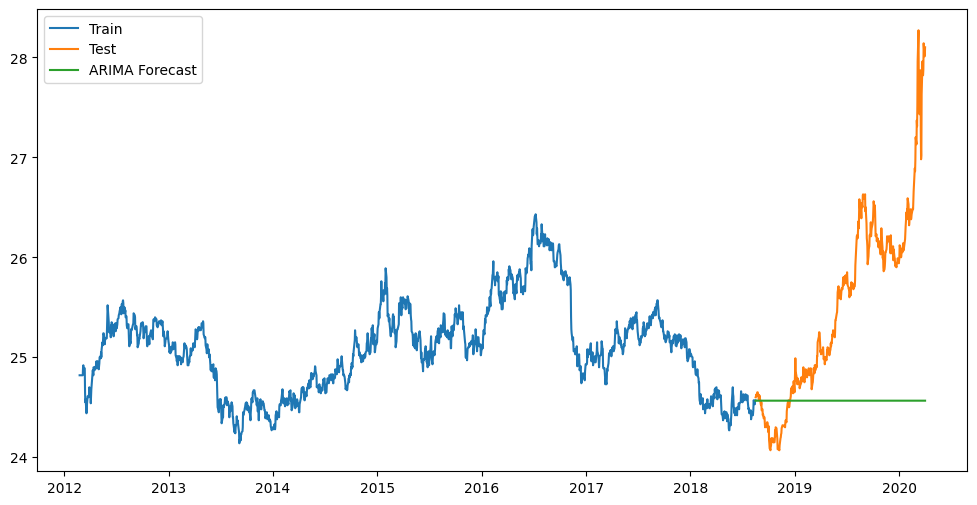

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Fit ARIMA (p,d,q) = (5,1,0) as a start
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluation
rmse_arima = math.sqrt(mean_squared_error(test, arima_forecast))
mae_arima = mean_absolute_error(test, arima_forecast)
print("ARIMA RMSE:", rmse_arima, " MAE:", mae_arima)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label="Train")
plt.plot(test.index, test['Close'], label="Test")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.legend(); plt.show()

SARIMA Model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 1.3782990883487598  MAE: 1.085547745654817


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


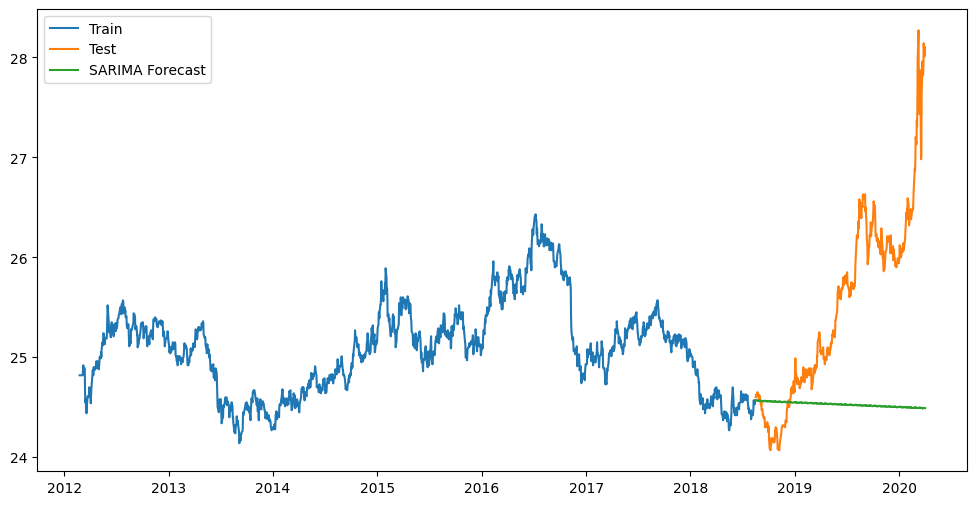

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Seasonal ARIMA (p,d,q)(P,D,Q,m)
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit(disp=False)

sarima_forecast = sarima_fit.forecast(steps=len(test))

# Evaluation
rmse_sarima = math.sqrt(mean_squared_error(test, sarima_forecast))
mae_sarima = mean_absolute_error(test, sarima_forecast)
print("SARIMA RMSE:", rmse_sarima, " MAE:", mae_sarima)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label="Train")
plt.plot(test.index, test['Close'], label="Test")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast")
plt.legend(); plt.show()

LSTM Model

2025-08-20 15:38:40.078456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755704320.294115      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755704320.355902      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


2025-08-20 15:38:52.388254: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0233
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.7566e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.3723e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 6.9772e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5.9843e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 6.2977e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.7634e-04
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.8075e-04
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.9847e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
LSTM RMSE: 0.17515247910513934  MAE: 0.12157432960741466


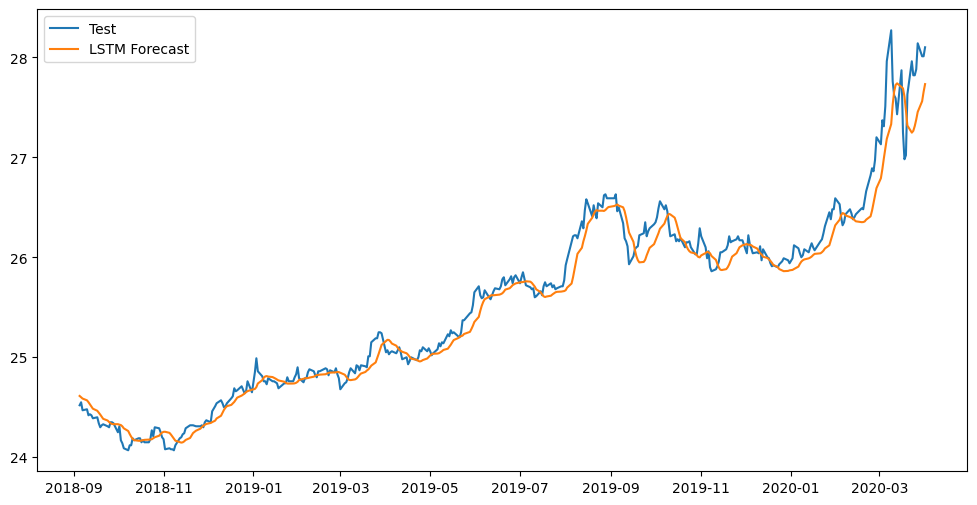

In [7]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled, seq_length)

# Train-test split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

# Train
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluation
rmse_lstm = math.sqrt(mean_squared_error(y_test_inv, y_pred))
mae_lstm = mean_absolute_error(y_test_inv, y_pred)
print("LSTM RMSE:", rmse_lstm, " MAE:", mae_lstm)

# Plot
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(y_test):], y_test_inv, label="Test")
plt.plot(data.index[-len(y_test):], y_pred, label="LSTM Forecast")
plt.legend(); plt.show()

Compare Models

In [8]:
print("📊 Model Performance Comparison:")
print(f"ARIMA   → RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")
print(f"SARIMA  → RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f}")
print(f"LSTM    → RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f}")

📊 Model Performance Comparison:
ARIMA   → RMSE: 1.34, MAE: 1.05
SARIMA  → RMSE: 1.38, MAE: 1.09
LSTM    → RMSE: 0.18, MAE: 0.12


In [21]:
# ========================
# Section 1: Setup & Loader
# ========================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Helper: Evaluation Metrics
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "MAPE": mape, "R2": r2}

# Path to dataset folder
data_path = "/kaggle/input/stock-market-dataset/etfs"

# Collect all tickers (CSV files)
tickers = [f for f in os.listdir(data_path) if f.endswith(".csv")]
print("Found tickers:", tickers[:10], "...")

Found tickers: ['LVHE.csv', 'HAUZ.csv', 'HDIV.csv', 'NETL.csv', 'HYDB.csv', 'XPP.csv', 'SPGP.csv', 'INTF.csv', 'SPBO.csv', 'PLW.csv'] ...


In [22]:
# ========================
# Section 2: ARIMA & SARIMA
# ========================
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

def run_arima(train, test):
    try:
        model = ARIMA(train, order=(5,1,0))
        fit = model.fit()
        forecast = fit.forecast(steps=len(test))
        return forecast
    except:
        return pd.Series([np.nan]*len(test), index=test.index)

def run_sarima(train, test):
    try:
        model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
        fit = model.fit(disp=False)
        forecast = fit.forecast(steps=len(test))
        return forecast
    except:
        return pd.Series([np.nan]*len(test), index=test.index)

In [23]:
# ========================
# Section 3: LSTM Model
# ========================
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def run_lstm(data, train_size=0.8, seq_length=60, epochs=10):
    if len(data) <= seq_length + 5:
        return None, None  # not enough data

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled = scaler.fit_transform(data)

    # Create sequences
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data)-seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    X, y = create_sequences(scaled, seq_length)
    if len(X) == 0:
        return None, None

    split = int(len(X)*train_size)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Reshape for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    return y_test_inv.flatten(), y_pred.flatten()

In [24]:
# ========================
# Section 4: Pipeline for One Ticker
# ========================
def run_pipeline(ticker_file):
    print(f"\n🔹 Running for {ticker_file}")
    df = pd.read_csv(os.path.join(data_path, ticker_file))
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.dropna()
    data = df[['Close']]

    # Skip if too small
    if len(data) < 100:
        print("⚠️ Skipped (too few rows)")
        return None, None, None, None, None

    # Split train-test
    train_size = int(len(data) * 0.8)
    train, test = data.iloc[:train_size], data.iloc[train_size:]

    results = {}
    predictions = {}

    # --- ARIMA ---
    arima_pred = run_arima(train, test)
    results["ARIMA"] = evaluate_model(test.values.flatten(), arima_pred.values.flatten())
    predictions["ARIMA"] = arima_pred

    # --- SARIMA ---
    sarima_pred = run_sarima(train, test)
    results["SARIMA"] = evaluate_model(test.values.flatten(), sarima_pred.values.flatten())
    predictions["SARIMA"] = sarima_pred

    # --- LSTM ---
    y_test_inv, y_pred = run_lstm(data.values)
    if y_test_inv is not None:
        results["LSTM"] = evaluate_model(y_test_inv, y_pred)
        predictions["LSTM"] = pd.Series(y_pred, index=data.index[-len(y_pred):])

    return data, train, test, predictions, results

In [25]:
# ========================
# Section 5: Visualization
# ========================
def plot_forecasts(train, test, predictions, ticker):
    plt.figure(figsize=(14,6))
    plt.plot(train.index, train['Close'], label="Train")
    plt.plot(test.index, test['Close'], label="Test", color="black")

    for model, pred in predictions.items():
        plt.plot(pred.index, pred.values, label=f"{model} Forecast")

    plt.title(f"{ticker} - Model Forecasts")
    plt.legend()
    plt.show()

def plot_residuals(test, predictions, ticker):
    plt.figure(figsize=(14,5))
    for model, pred in predictions.items():
        min_len = min(len(test), len(pred))
        residuals = test['Close'].values[:min_len] - pred.values[:min_len]
        plt.plot(test.index[:min_len], residuals, label=model)
    plt.title(f"{ticker} - Residuals")
    plt.legend()
    plt.show()

def plot_comparison(results, ticker):
    df_res = pd.DataFrame(results).T
    df_res.plot(kind="bar", figsize=(12,6))
    plt.title(f"{ticker} - Model Performance Metrics")
    plt.ylabel("Error Value")
    plt.show()


🔹 Running for LVHE.csv
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


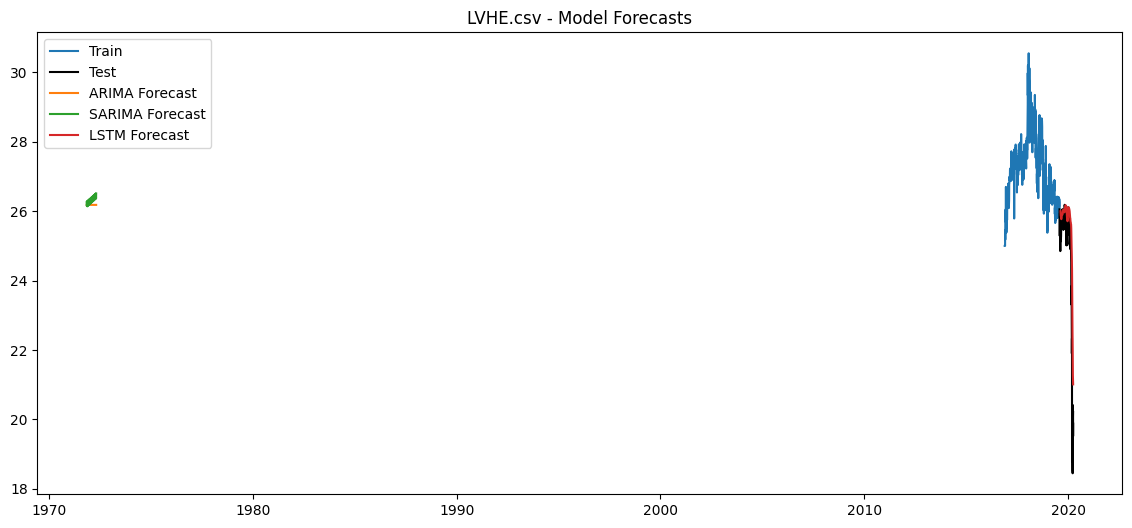

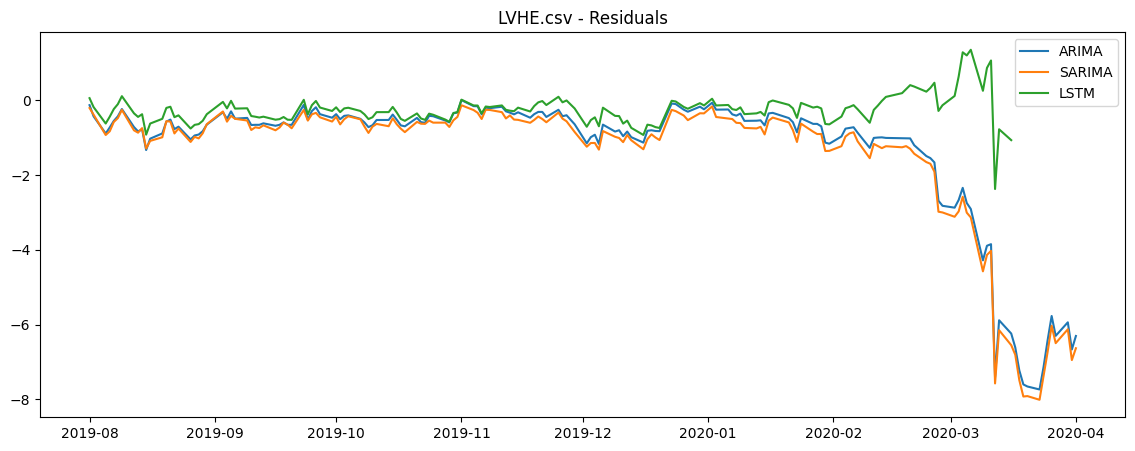

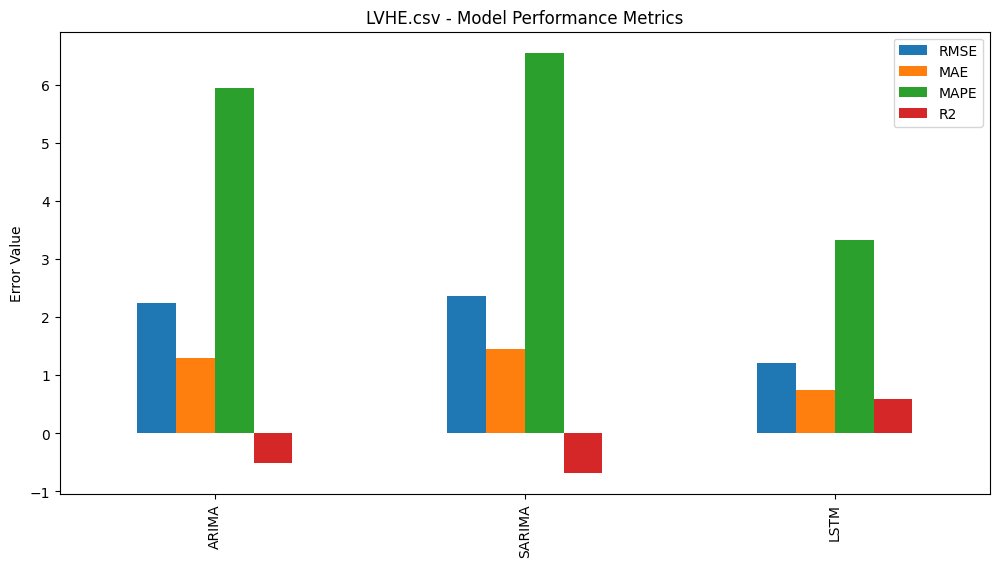


🔹 Running for HAUZ.csv
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


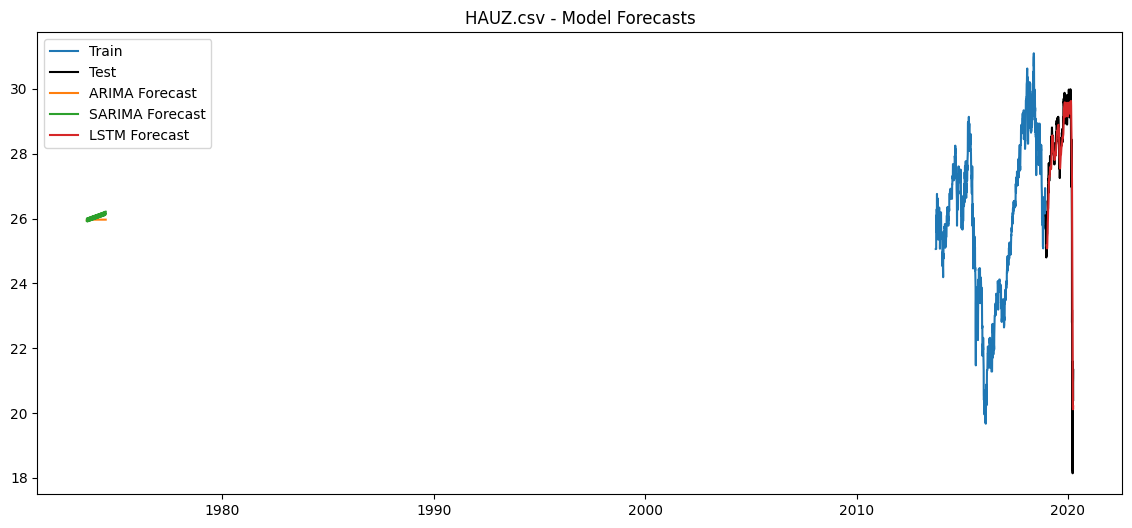

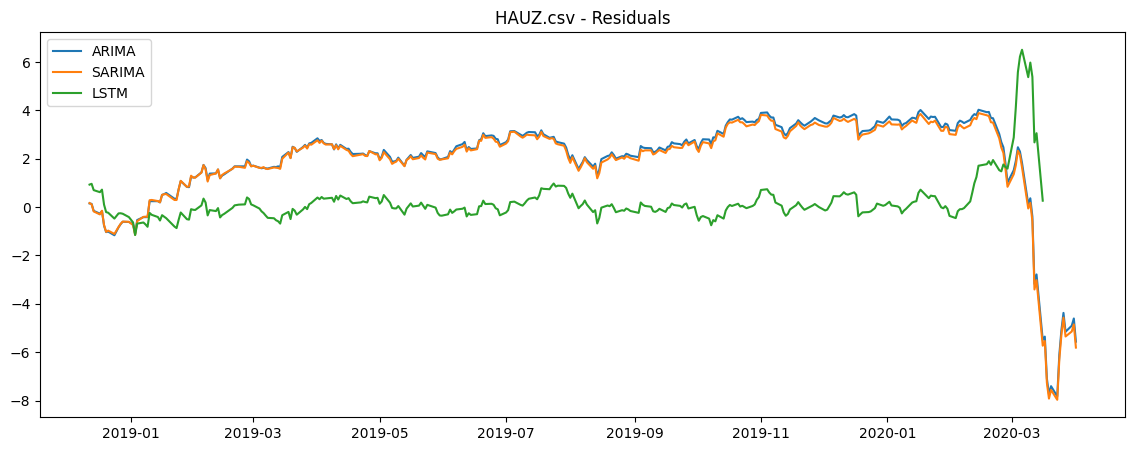

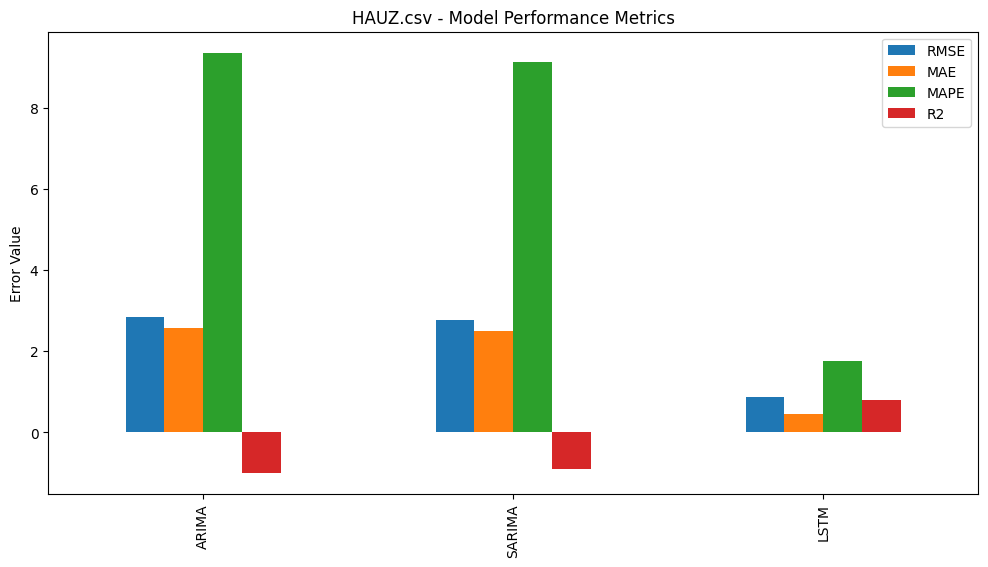


🔹 Running for HDIV.csv
⚠️ Skipped (too few rows)

✅ Final Results:

Ticker: LVHE.csv
            RMSE       MAE      MAPE        R2
ARIMA   2.247623  1.303805  5.942028 -0.507032
SARIMA  2.370838  1.450789  6.552001 -0.676793
LSTM    1.207029  0.740632  3.323453  0.591611

Ticker: HAUZ.csv
            RMSE       MAE      MAPE        R2
ARIMA   2.841029  2.579173  9.358363 -0.993819
SARIMA  2.774015  2.505812  9.117653 -0.900868
LSTM    0.881117  0.441253  1.767462  0.802940


In [26]:
# ========================
# Section 6: Run Multiple Tickers
# ========================
all_results = {}

for ticker in tickers[:3]:   # run on first 3 tickers for demo
    data, train, test, predictions, results = run_pipeline(ticker)

    if results is None:  # skip small datasets
        continue

    # Save results
    all_results[ticker] = results

    # Plots
    plot_forecasts(train, test, predictions, ticker)
    plot_residuals(test, predictions, ticker)
    plot_comparison(results, ticker)

# Compare across tickers
print("\n✅ Final Results:")
for t, r in all_results.items():
    print(f"\nTicker: {t}")
    print(pd.DataFrame(r).T)

In [27]:
# Symmetric MAPE
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Median Absolute Error
from sklearn.metrics import median_absolute_error

Residual Diagnostics

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(arima_fit.resid, lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  1.896377   0.997074


Extra Metrics (SMAPE, MedAE, Explained Variance, AIC/BIC)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score

# Symmetric MAPE
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true)+np.abs(y_pred)+1e-8))

def evaluate_model(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MedAE": median_absolute_error(y_true, y_pred),
        "MAPE": np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        "SMAPE": smape(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "ExplVar": explained_variance_score(y_true, y_pred)
    }

Residual Diagnostics (Histogram, QQ-Plot, ACF)

In [32]:
import seaborn as sns
import statsmodels.api as sm

def plot_residual_analysis(test, predictions, ticker):
    for model, pred in predictions.items():
        min_len = min(len(test), len(pred))
        residuals = test['Close'].values[:min_len] - pred.values[:min_len]

        fig, axs = plt.subplots(1,3, figsize=(16,4))
        fig.suptitle(f"{ticker} - Residual Analysis ({model})")

        # Histogram
        sns.histplot(residuals, kde=True, ax=axs[0])
        axs[0].set_title("Residual Distribution")

        # QQ Plot
        sm.qqplot(residuals, line='s', ax=axs[1])
        axs[1].set_title("QQ-Plot")

        # Autocorrelation
        sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axs[2])
        axs[2].set_title("ACF of Residuals")

        plt.show()
    plot_residual_analysis(test, predictions, "GOVT")

Metrics Comparison Bar Chart

In [33]:
def plot_comparison(results, ticker):
    df_res = pd.DataFrame(results).T
    df_res[['RMSE','MAE','MAPE','SMAPE','R2']].plot(kind="bar", figsize=(12,6))
    plt.title(f"{ticker} - Model Metrics Comparison")
    plt.ylabel("Error / Score")
    plt.show()

Heatmap for All Tickers

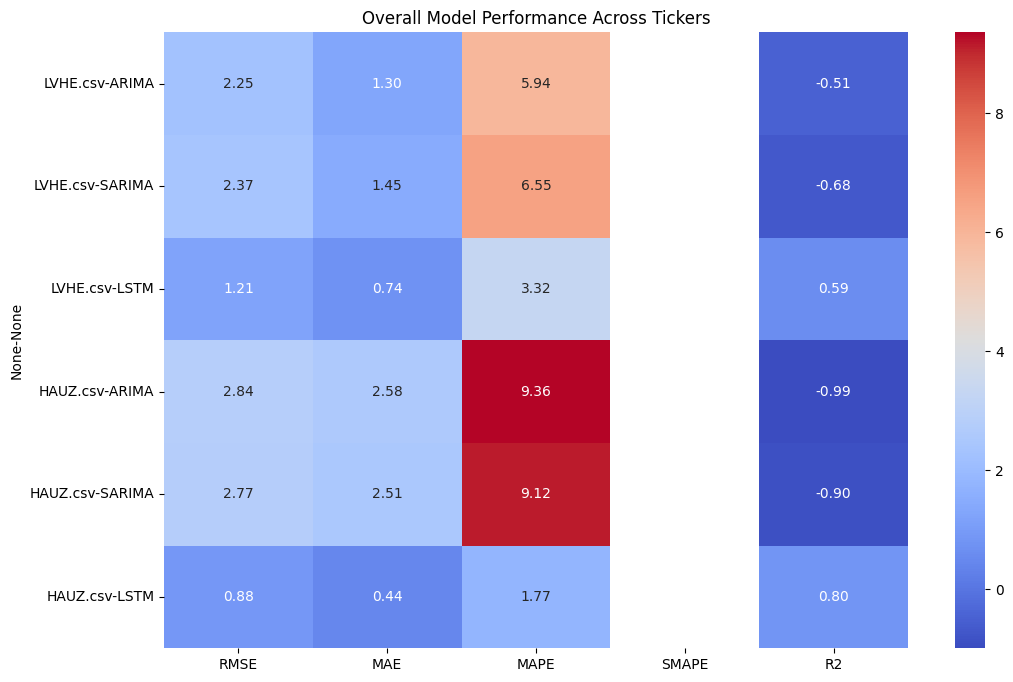

In [35]:
# Collect results into one big DataFrame
final_table = pd.concat({k: pd.DataFrame(v).T for k,v in all_results.items()})

# Ensure all metric columns exist
metrics_needed = ['RMSE','MAE','MAPE','SMAPE','R2']
for col in metrics_needed:
    if col not in final_table.columns:
        final_table[col] = np.nan

# Select only the required metrics & drop models with all NaN
final_table_clean = final_table[metrics_needed].astype(float).dropna(how="all")

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(final_table_clean, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Overall Model Performance Across Tickers")
plt.show()

Code for Stocks Folder

Found tickers: ['MTL.csv', 'JOE.csv', 'DRE.csv', 'CTY.csv', 'AMSF.csv', 'IMH.csv', 'GFL.csv', 'CLM.csv', 'UBER.csv', 'NEBU.csv'] ...

🔹 Running for MTL.csv
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


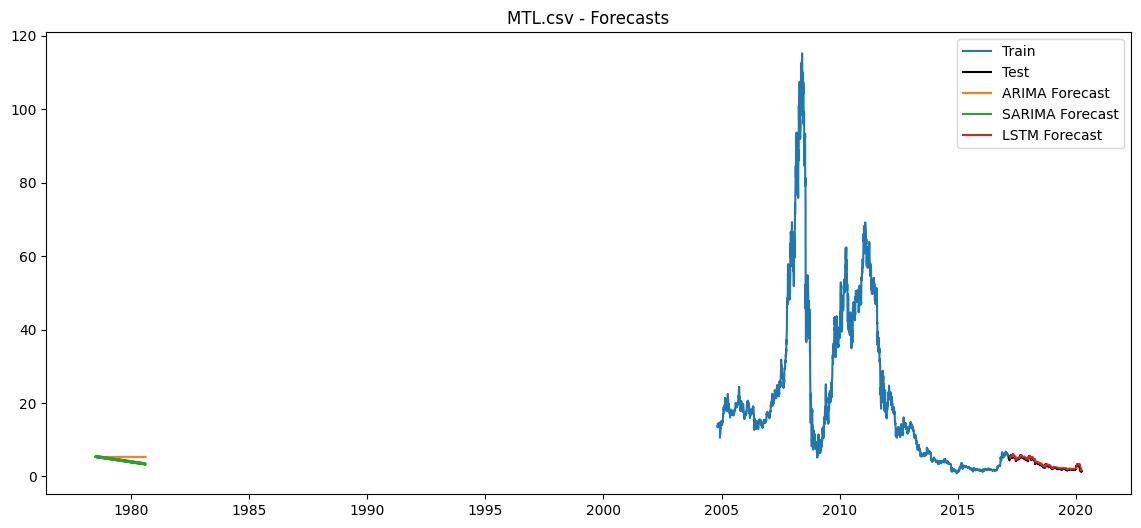

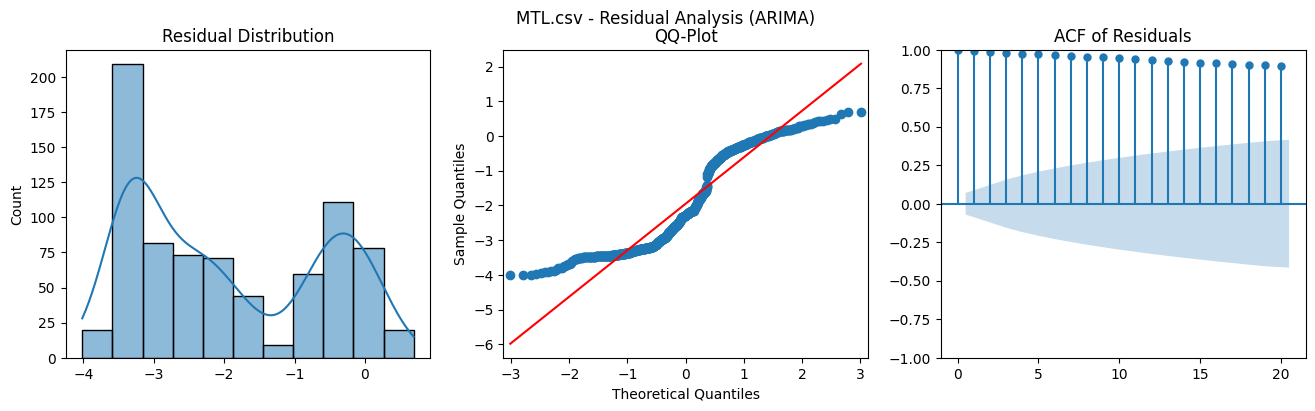

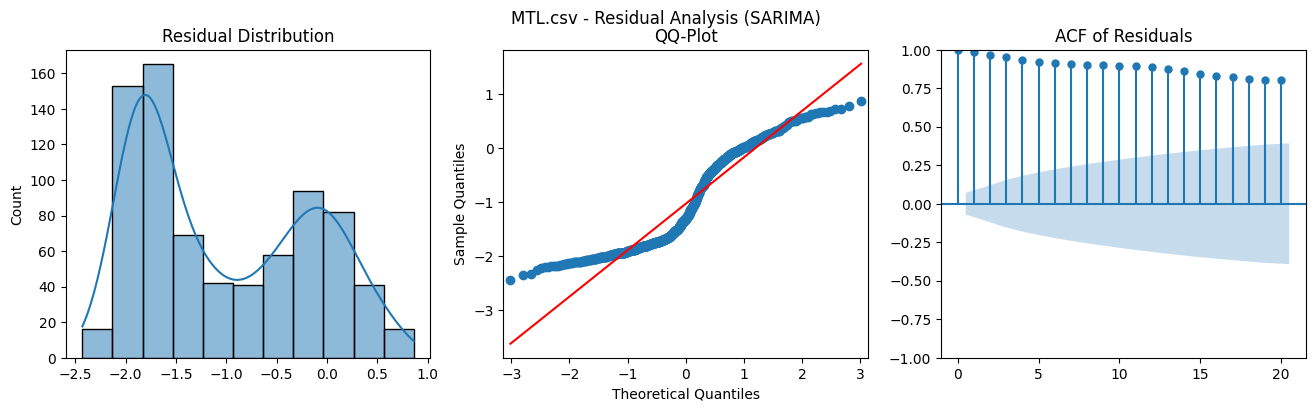

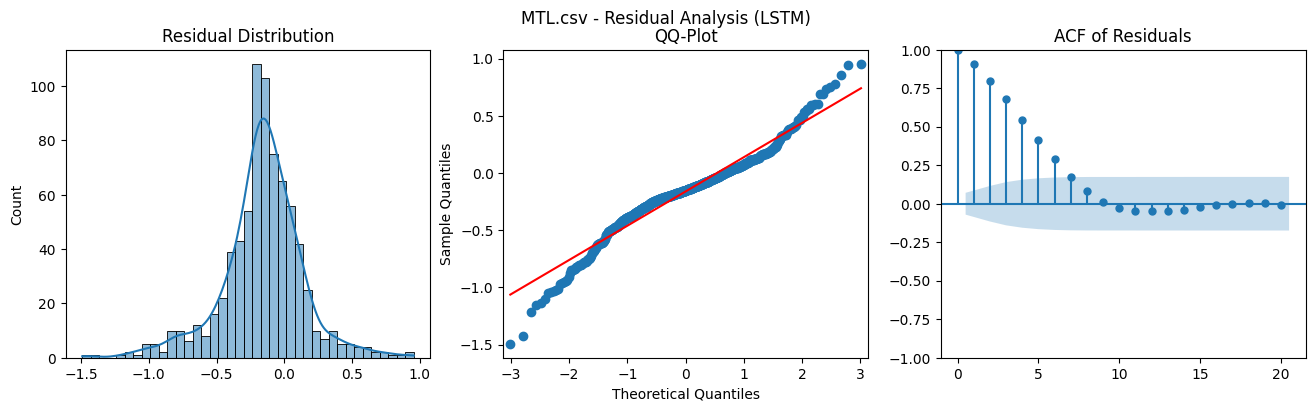

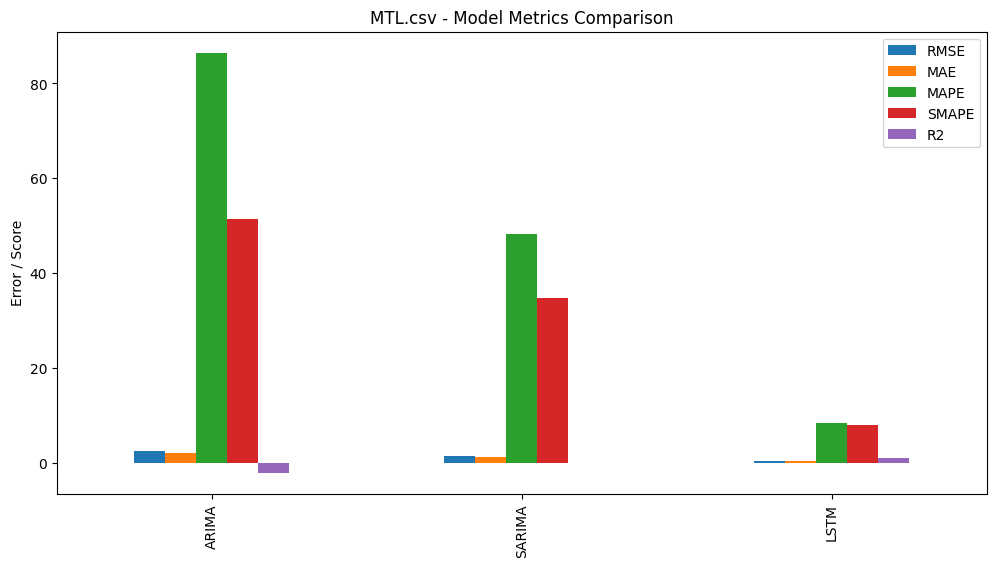


🔹 Running for JOE.csv
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


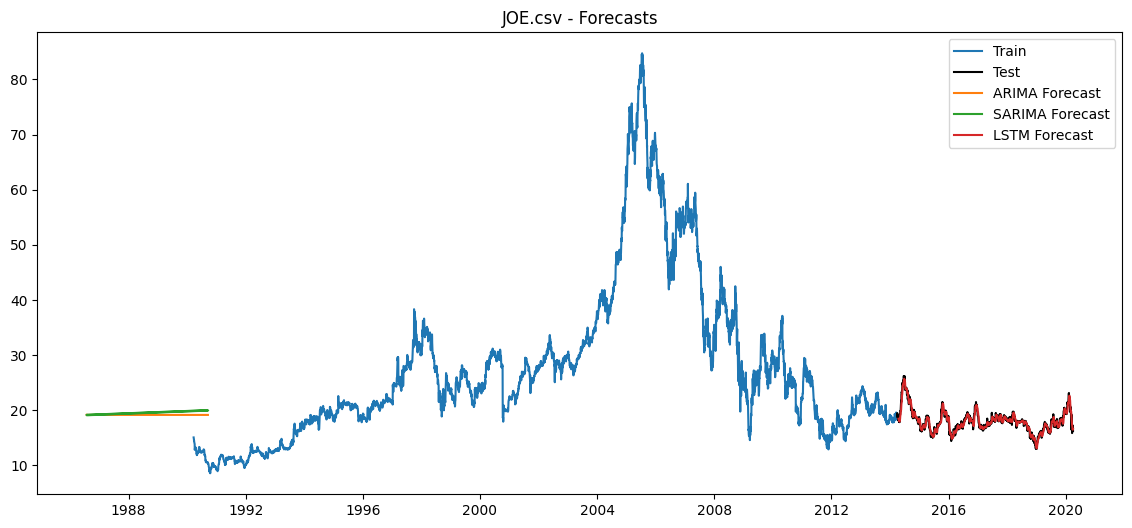

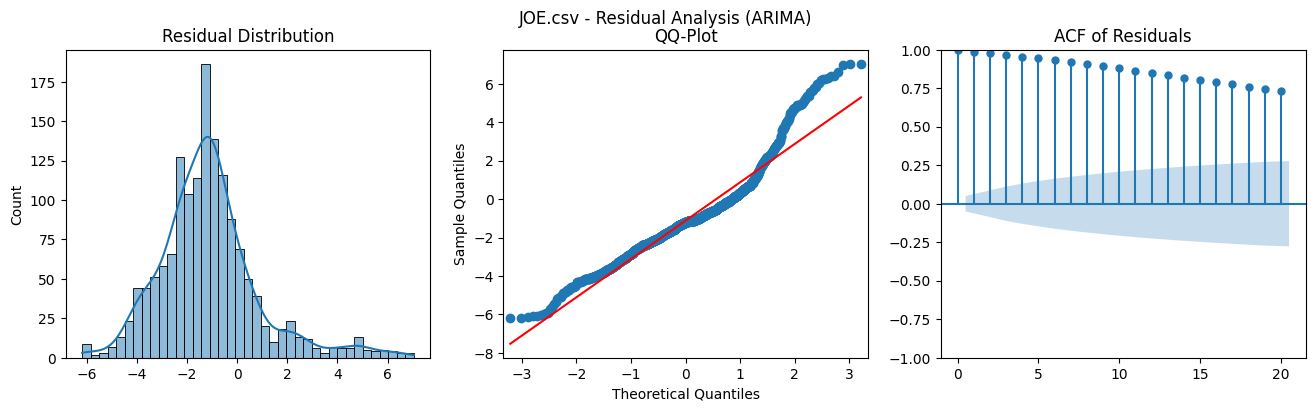

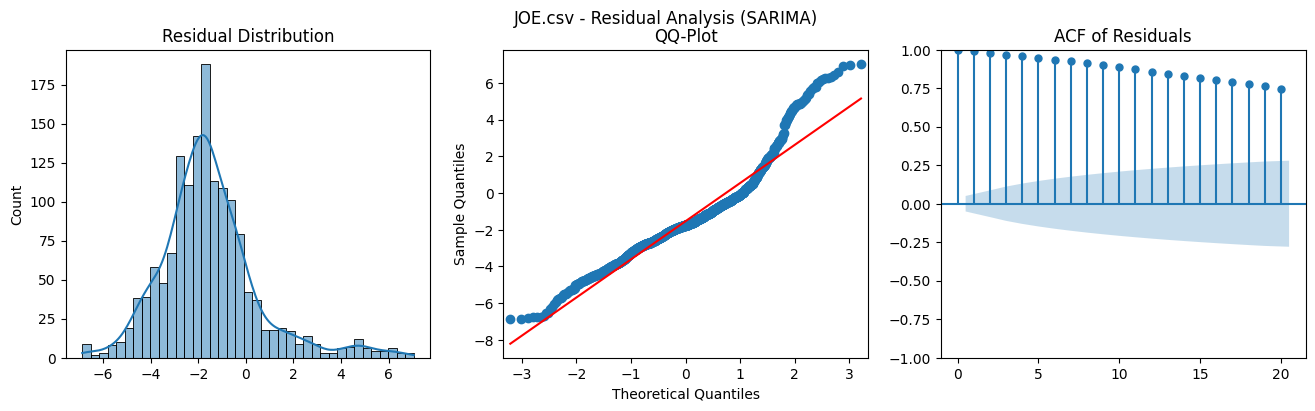

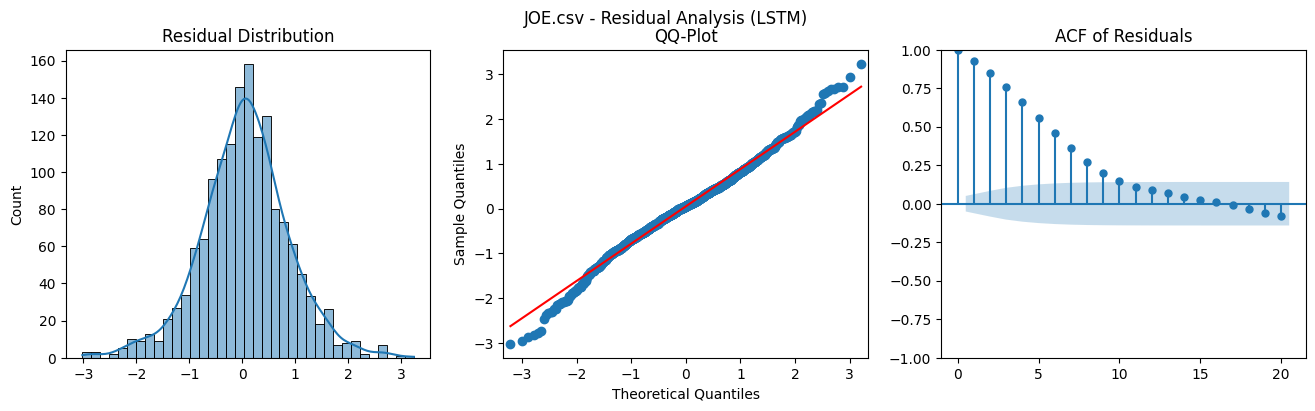

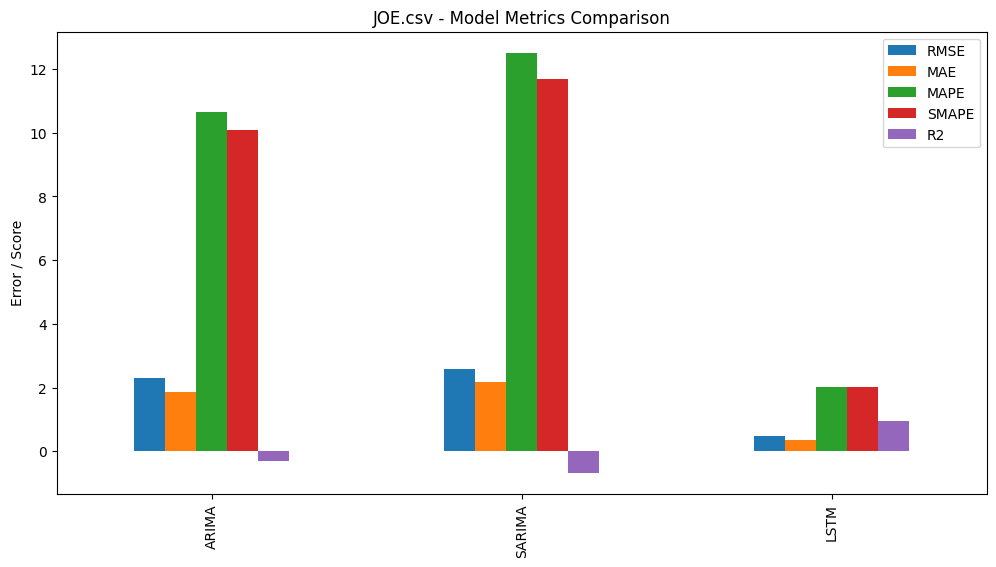


🔹 Running for DRE.csv
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


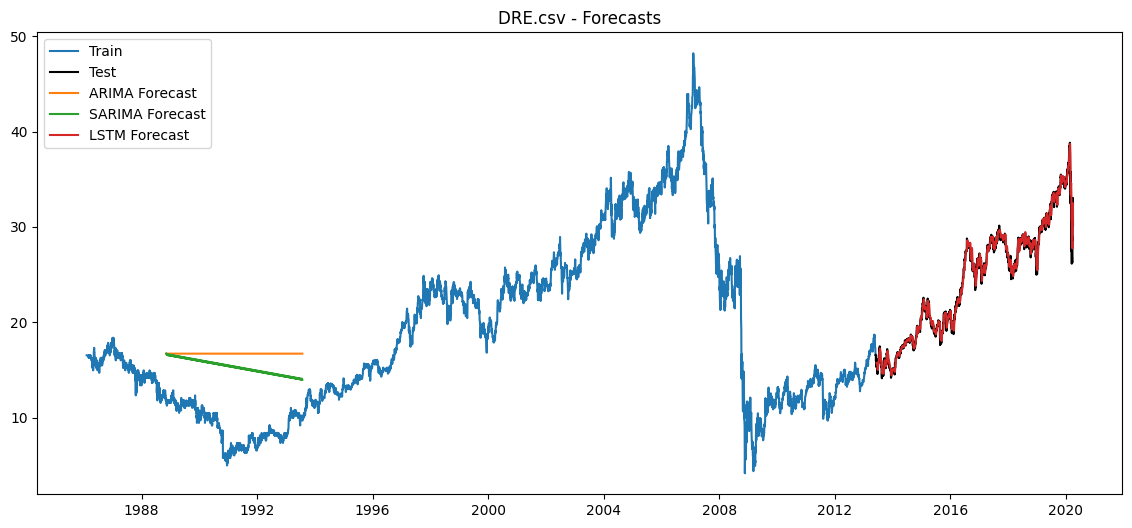

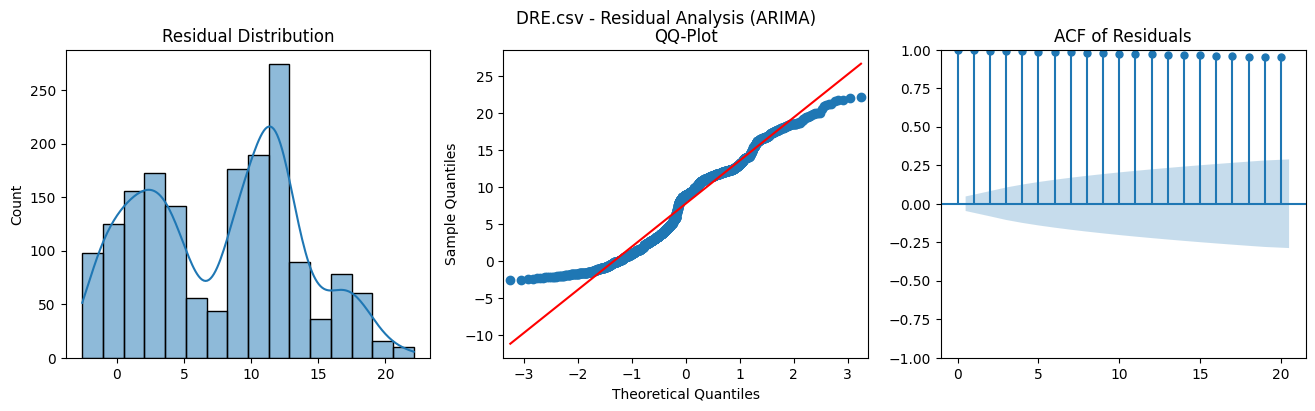

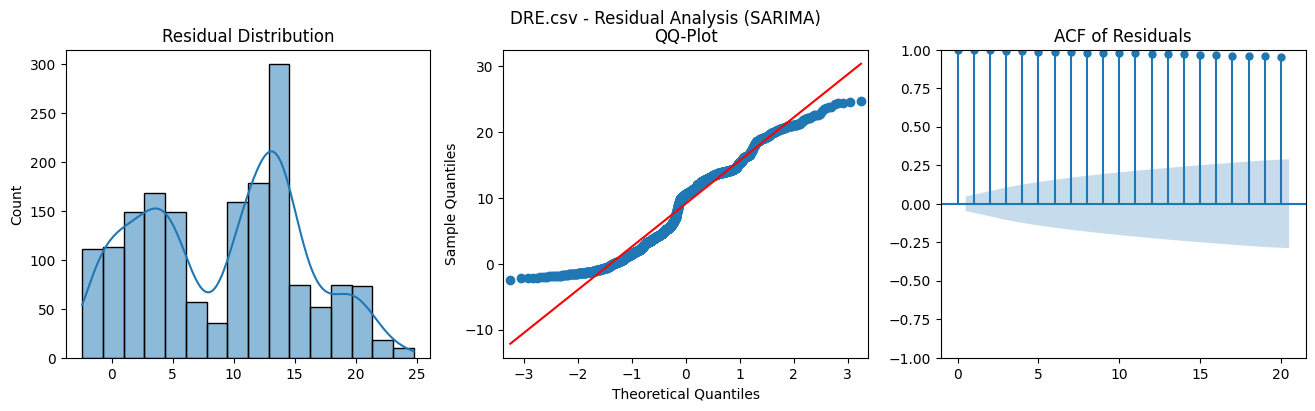

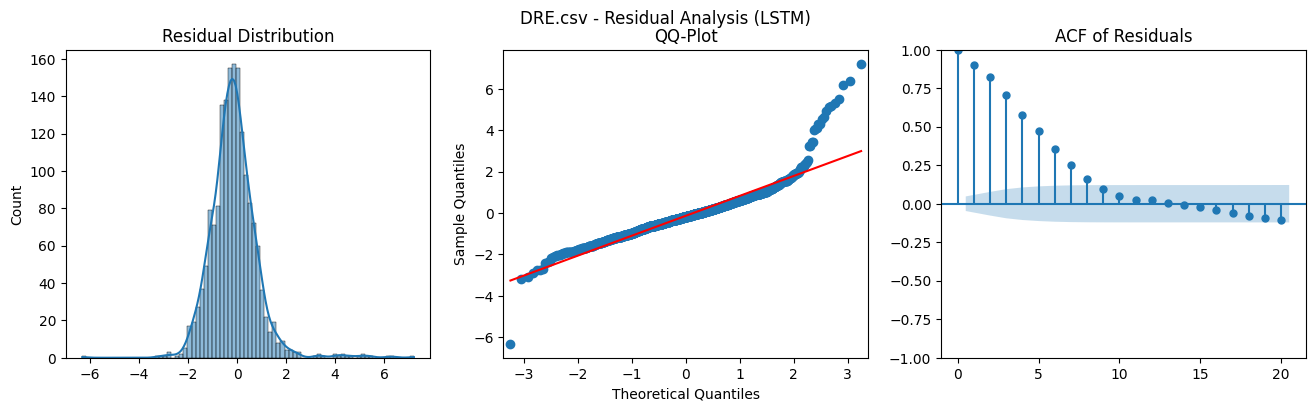

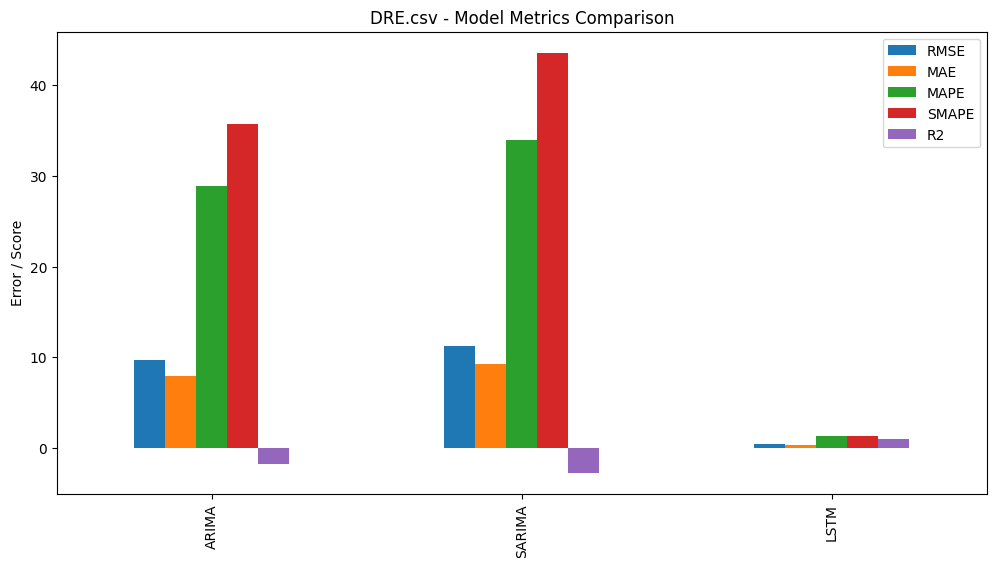


🔹 Running for CTY.csv
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


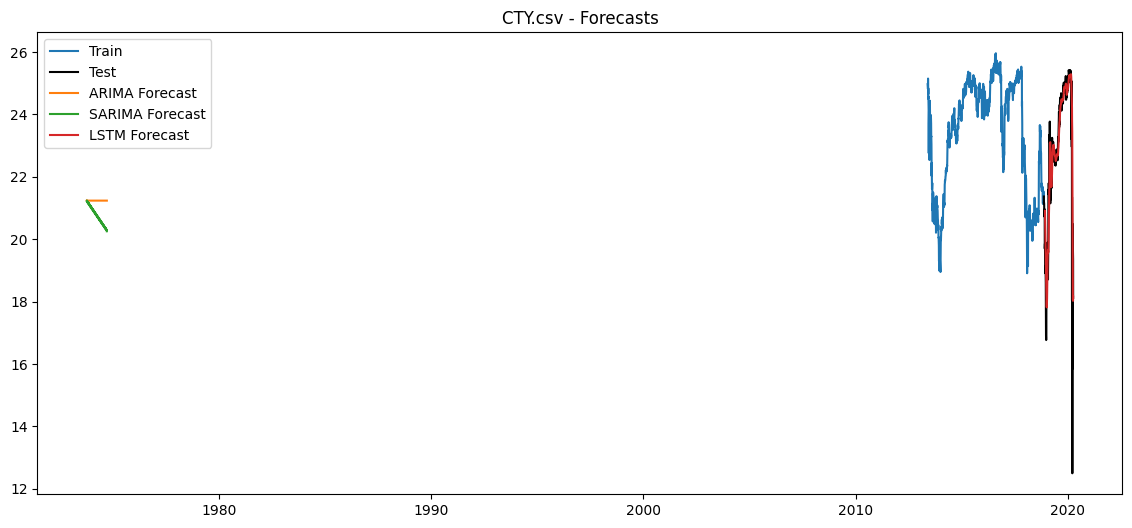

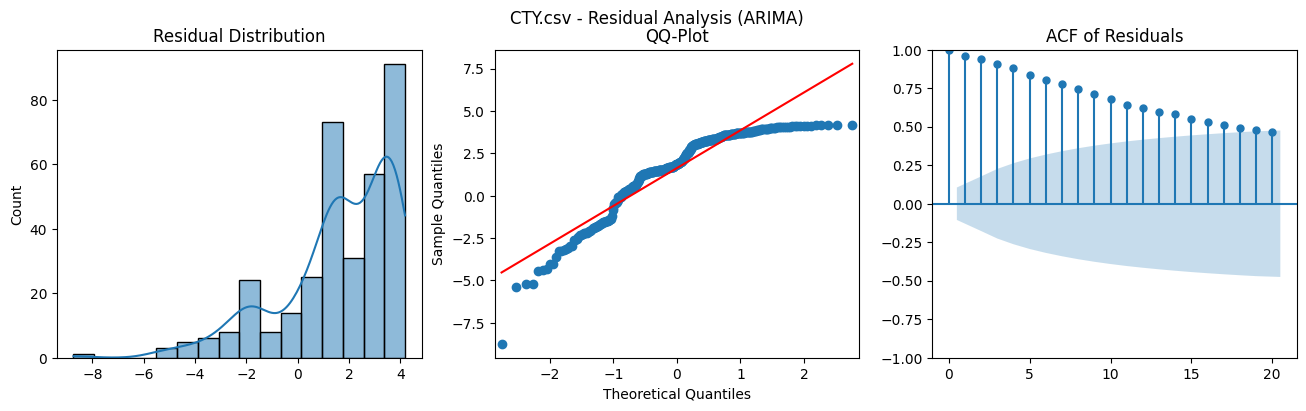

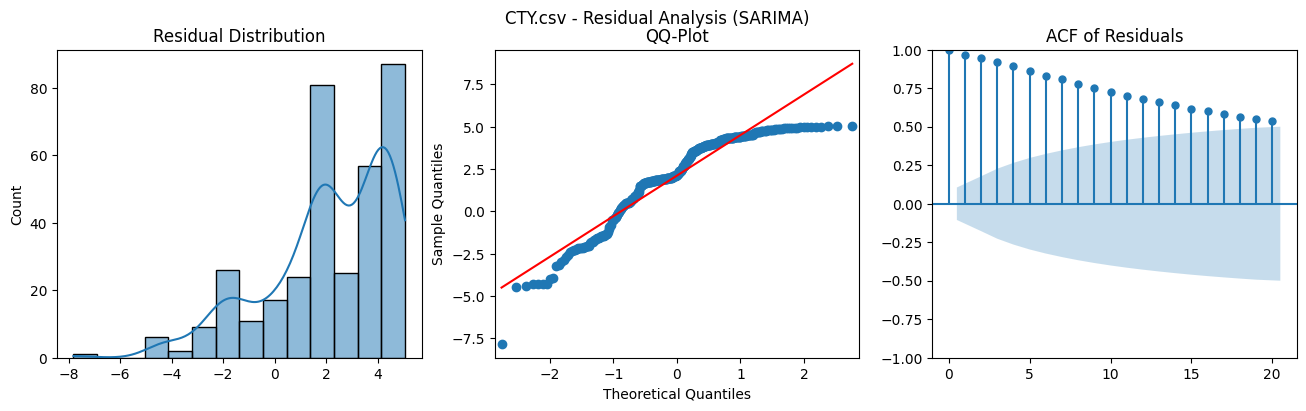

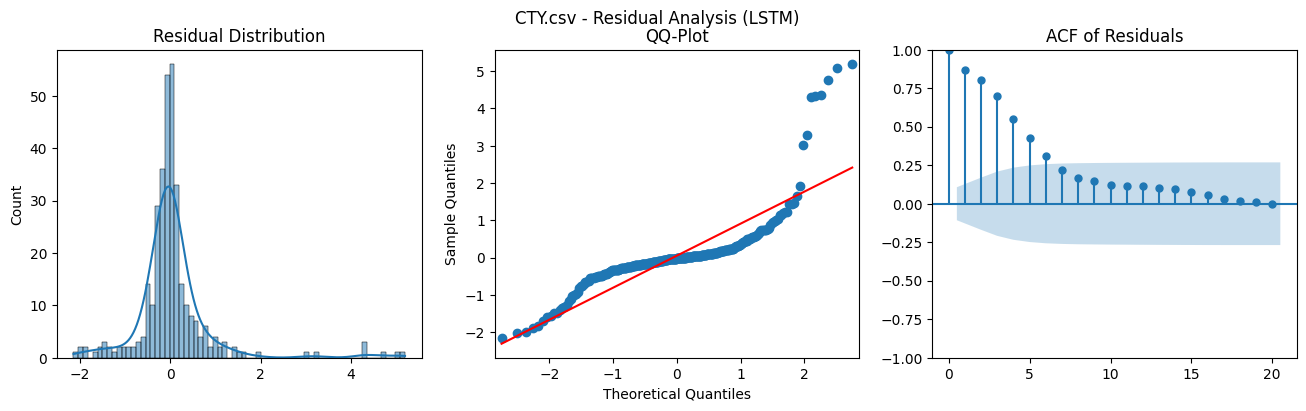

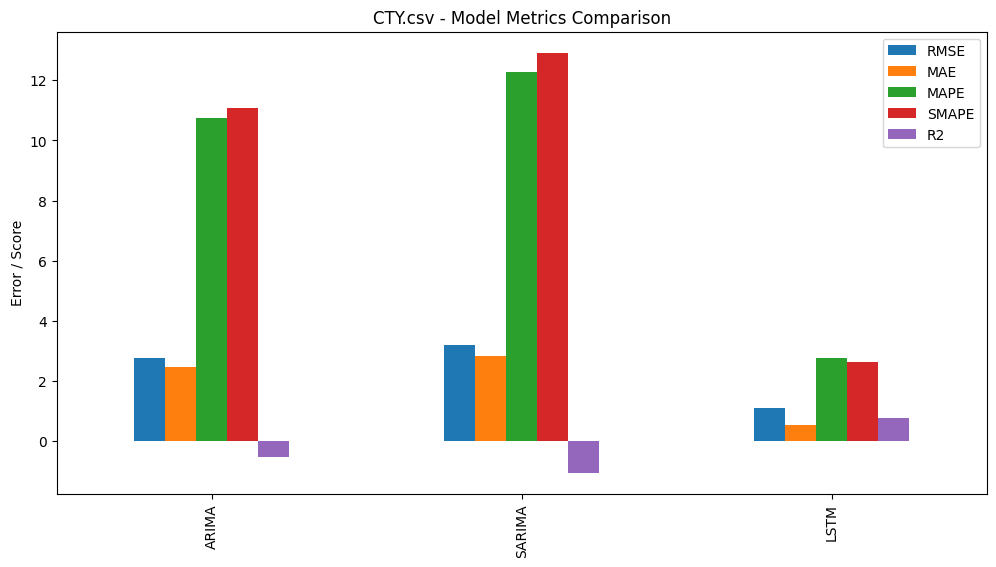


🔹 Running for AMSF.csv
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


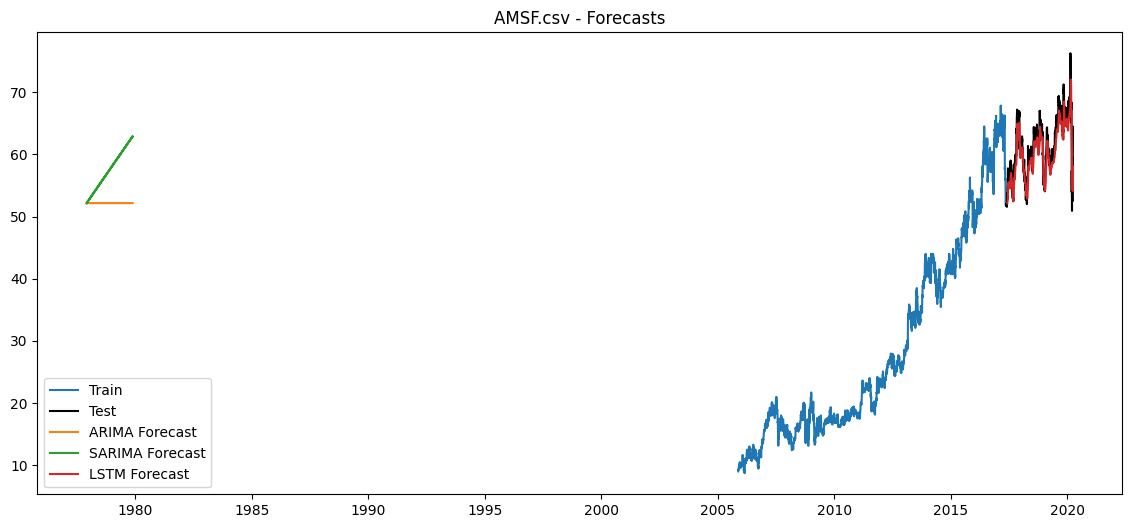

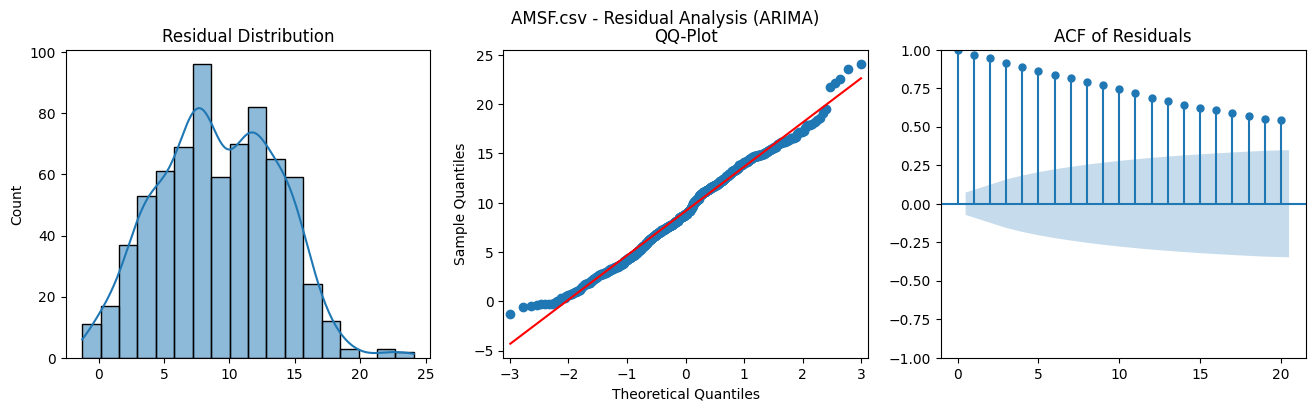

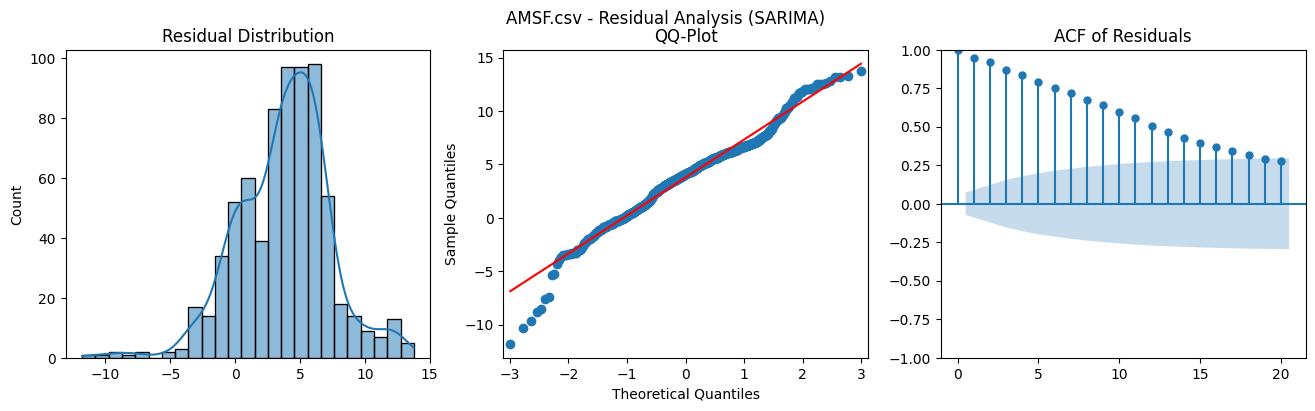

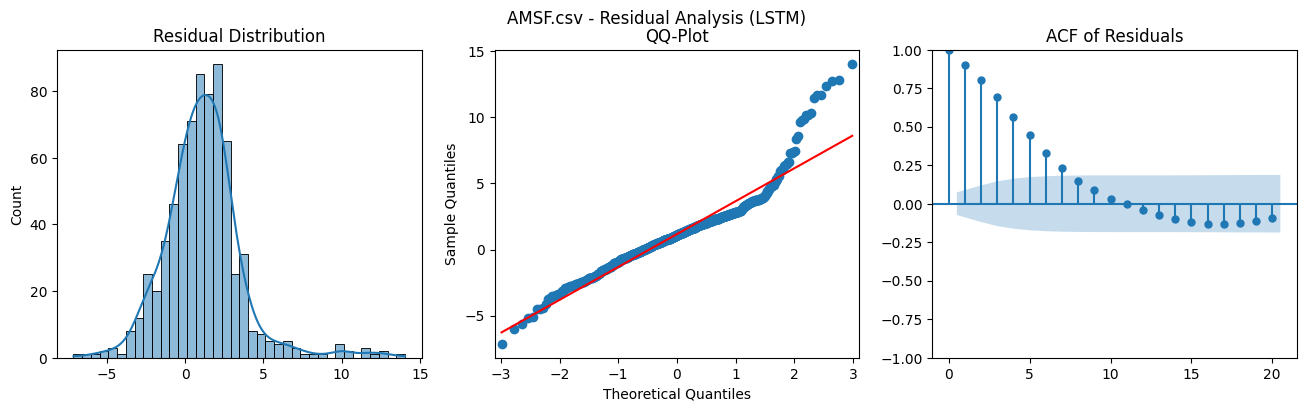

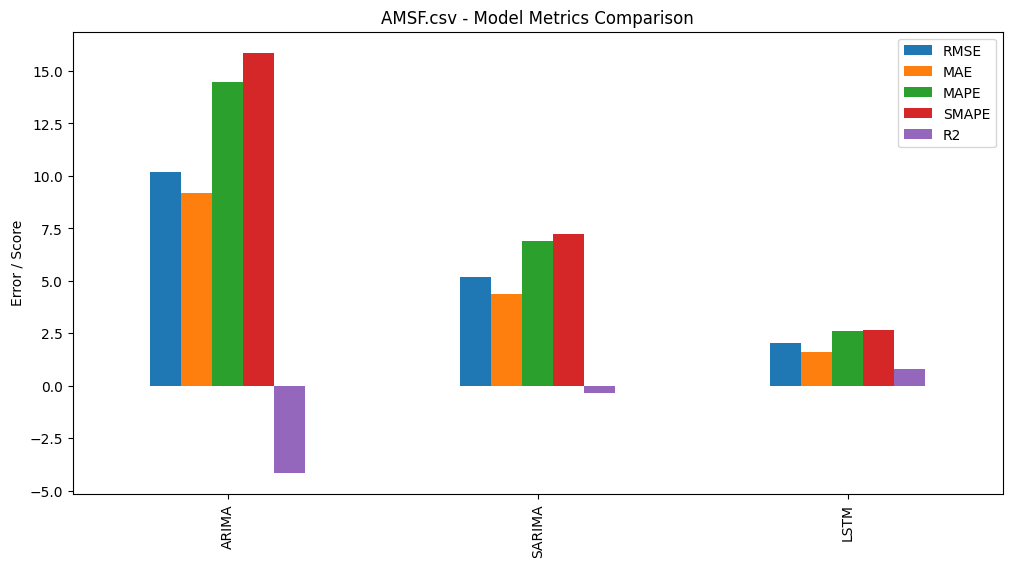

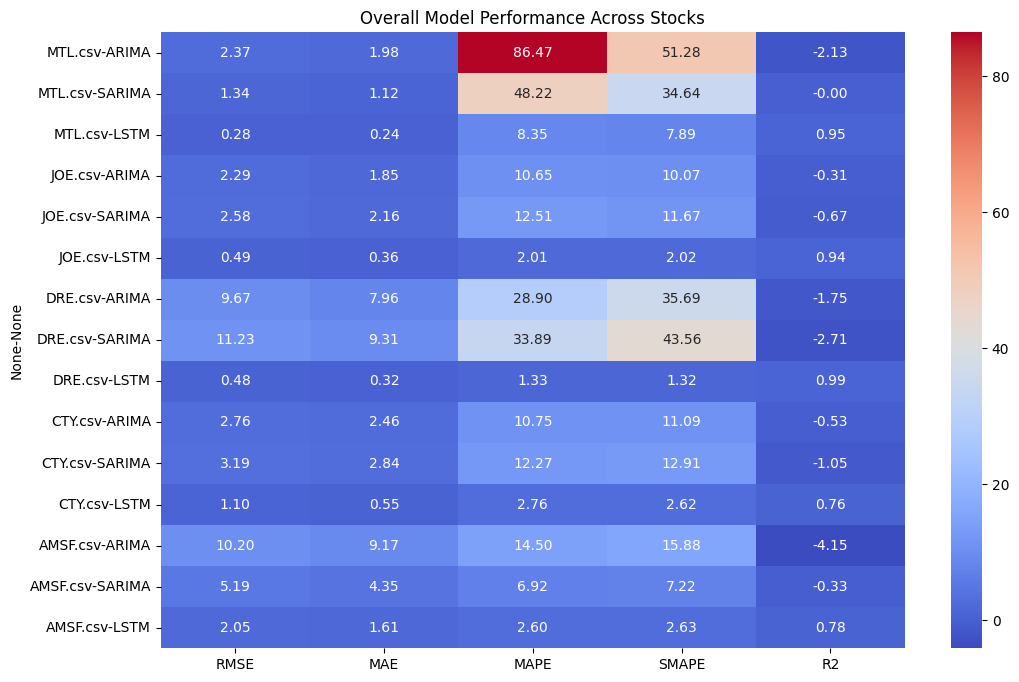


✅ Final Results Table:
                      RMSE       MAE       MAPE      SMAPE        R2
MTL.csv  ARIMA    2.365004  1.984931  86.470219  51.281575 -2.128626
         SARIMA   1.339796  1.120947  48.217609  34.637763 -0.004078
         LSTM     0.283535  0.242175   8.353037   7.892105  0.954849
JOE.csv  ARIMA    2.287027  1.849964  10.652059  10.074695 -0.312768
         SARIMA   2.580970  2.162075  12.512807  11.670946 -0.671904
         LSTM     0.486401  0.364906   2.014873   2.016405  0.941008
DRE.csv  ARIMA    9.674309  7.964693  28.900936  35.692539 -1.754737
         SARIMA  11.226878  9.314038  33.887095  43.562326 -2.709866
         LSTM     0.482100  0.316922   1.329353   1.323570  0.993104
CTY.csv  ARIMA    2.764683  2.456993  10.745240  11.088409 -0.534156
         SARIMA   3.192920  2.841333  12.267557  12.914901 -1.046232
         LSTM     1.096429  0.546624   2.758128   2.620954  0.759576
AMSF.csv ARIMA   10.204948  9.171126  14.498758  15.876590 -4.147695
         S

In [36]:
# ========================
# Section 1: Setup & Loader
# ========================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score

# Extra metric: Symmetric MAPE
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true)+np.abs(y_pred)+1e-8))

def evaluate_model(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MedAE": median_absolute_error(y_true, y_pred),
        "MAPE": np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        "SMAPE": smape(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "ExplVar": explained_variance_score(y_true, y_pred)
    }

# Path to STOCKS folder
data_path = "/kaggle/input/stock-market-dataset/stocks"
tickers = [f for f in os.listdir(data_path) if f.endswith(".csv")]
print("Found tickers:", tickers[:10], "...")


# ========================
# Section 2: ARIMA & SARIMA
# ========================
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

def run_arima(train, test):
    try:
        model = ARIMA(train, order=(5,1,0))
        fit = model.fit()
        forecast = fit.forecast(steps=len(test))
        return forecast, fit.aic, fit.bic
    except:
        return pd.Series([np.nan]*len(test), index=test.index), np.nan, np.nan

def run_sarima(train, test):
    try:
        model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
        fit = model.fit(disp=False)
        forecast = fit.forecast(steps=len(test))
        return forecast, fit.aic, fit.bic
    except:
        return pd.Series([np.nan]*len(test), index=test.index), np.nan, np.nan


# ========================
# Section 3: LSTM
# ========================
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def run_lstm(data, train_size=0.8, seq_length=60, epochs=10):
    if len(data) <= seq_length + 5:
        return None, None

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled = scaler.fit_transform(data)

    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data)-seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    X, y = create_sequences(scaled, seq_length)
    if len(X) == 0:
        return None, None

    split = int(len(X)*train_size)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    return y_test_inv.flatten(), y_pred.flatten()


# ========================
# Section 4: Pipeline
# ========================
def run_pipeline(ticker_file):
    print(f"\n🔹 Running for {ticker_file}")
    df = pd.read_csv(os.path.join(data_path, ticker_file))
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.dropna()
    data = df[['Close']]

    if len(data) < 100:
        print("⚠️ Skipped (too few rows)")
        return None, None, None, None, None

    train_size = int(len(data) * 0.8)
    train, test = data.iloc[:train_size], data.iloc[train_size:]

    results = {}
    predictions = {}

    # --- ARIMA ---
    arima_pred, aic, bic = run_arima(train, test)
    res_arima = evaluate_model(test.values.flatten(), arima_pred.values.flatten())
    res_arima["AIC"] = aic
    res_arima["BIC"] = bic
    results["ARIMA"] = res_arima
    predictions["ARIMA"] = arima_pred

    # --- SARIMA ---
    sarima_pred, aic, bic = run_sarima(train, test)
    res_sarima = evaluate_model(test.values.flatten(), sarima_pred.values.flatten())
    res_sarima["AIC"] = aic
    res_sarima["BIC"] = bic
    results["SARIMA"] = res_sarima
    predictions["SARIMA"] = sarima_pred

    # --- LSTM ---
    y_test_inv, y_pred = run_lstm(data.values)
    if y_test_inv is not None:
        results["LSTM"] = evaluate_model(y_test_inv, y_pred)
        predictions["LSTM"] = pd.Series(y_pred, index=data.index[-len(y_pred):])

    return data, train, test, predictions, results


# ========================
# Section 5: Visualization
# ========================
import statsmodels.api as sm

def plot_forecasts(train, test, predictions, ticker):
    plt.figure(figsize=(14,6))
    plt.plot(train.index, train['Close'], label="Train")
    plt.plot(test.index, test['Close'], label="Test", color="black")
    for model, pred in predictions.items():
        plt.plot(pred.index, pred.values, label=f"{model} Forecast")
    plt.title(f"{ticker} - Forecasts")
    plt.legend(); plt.show()

def plot_residual_analysis(test, predictions, ticker):
    for model, pred in predictions.items():
        min_len = min(len(test), len(pred))
        residuals = test['Close'].values[:min_len] - pred.values[:min_len]

        fig, axs = plt.subplots(1,3, figsize=(16,4))
        fig.suptitle(f"{ticker} - Residual Analysis ({model})")

        sns.histplot(residuals, kde=True, ax=axs[0])
        axs[0].set_title("Residual Distribution")

        sm.qqplot(residuals, line='s', ax=axs[1])
        axs[1].set_title("QQ-Plot")

        sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axs[2])
        axs[2].set_title("ACF of Residuals")

        plt.show()

def plot_comparison(results, ticker):
    df_res = pd.DataFrame(results).T
    df_res[['RMSE','MAE','MAPE','SMAPE','R2']].plot(kind="bar", figsize=(12,6))
    plt.title(f"{ticker} - Model Metrics Comparison")
    plt.ylabel("Error / Score")
    plt.show()


# ========================
# Section 6: Run Multiple Stocks
# ========================
all_results = {}

# Run on first 5 stocks (you can increase to all)
for ticker in tickers[:5]:
    data, train, test, predictions, results = run_pipeline(ticker)
    if results is None:
        continue
    all_results[ticker] = results

    plot_forecasts(train, test, predictions, ticker)
    plot_residual_analysis(test, predictions, ticker)
    plot_comparison(results, ticker)

# ========================
# Section 7: Heatmap for All Tickers
# ========================
# Collect results
final_table = pd.concat({k: pd.DataFrame(v).T for k,v in all_results.items()})

# Ensure metrics exist
metrics_needed = ['RMSE','MAE','MAPE','SMAPE','R2']
for col in metrics_needed:
    if col not in final_table.columns:
        final_table[col] = np.nan

final_table_clean = final_table[metrics_needed].astype(float).dropna(how="all")

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(final_table_clean, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Overall Model Performance Across Stocks")
plt.show()

print("\n✅ Final Results Table:")
print(final_table_clean)


rolling / walk-forward validation

In [37]:
# =========================================
# Rolling / Walk-Forward Validation Pipeline
# =========================================
import os, warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score

# ---- Metrics helpers ----
def smape(y_true, y_pred):
    y_true = np.asarray(y_true).astype(float)
    y_pred = np.asarray(y_pred).astype(float)
    denom = np.abs(y_true) + np.abs(y_pred) + 1e-8
    return 100.0 / len(y_true) * np.sum(2.0 * np.abs(y_pred - y_true) / denom)

def eval_all(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MedAE": median_absolute_error(y_true, y_pred),
        "MAPE": np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100,
        "SMAPE": smape(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "ExplVar": explained_variance_score(y_true, y_pred)
    }

# ---- Data ----
DATA_PATH = "/kaggle/input/stock-market-dataset/stocks"
TICKERS = [f for f in os.listdir(DATA_PATH) if f.endswith(".csv")]
print("Found tickers:", TICKERS[:10], "...")

# ---- Classical models ----
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

def fit_forecast_arima(train_series, steps=1, order=(5,1,0)):
    try:
        model = ARIMA(train_series, order=order)
        fit = model.fit()
        fc = fit.forecast(steps=steps)
        return fc.iloc[-1]
    except Exception:
        return np.nan

def fit_forecast_sarima(train_series, steps=1, order=(1,1,1), seasonal_order=(1,1,1,12)):
    try:
        model = SARIMAX(train_series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        fit = model.fit(disp=False)
        fc = fit.forecast(steps=steps)
        return fc.iloc[-1]
    except Exception:
        return np.nan

Found tickers: ['MTL.csv', 'JOE.csv', 'DRE.csv', 'CTY.csv', 'AMSF.csv', 'IMH.csv', 'GFL.csv', 'CLM.csv', 'UBER.csv', 'NEBU.csv'] ...


In [38]:
# ---- LSTM (with refit_every) ----
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm(seq_len):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_len, 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

def lstm_one_step_predict(history_values, model_state):
    """
    history_values: 1D array of past Close values (float)
    model_state: dict with {'scaler', 'model', 'seq_len'}
    Returns next-step prediction (float) using existing model_state.
    """
    scaler = model_state["scaler"]
    seq_len = model_state["seq_len"]
    if len(history_values) < seq_len:
        return np.nan
    # scale
    hist_scaled = scaler.transform(history_values.reshape(-1,1))
    x_last = hist_scaled[-seq_len:].reshape(1, seq_len, 1)
    y_scaled = model_state["model"].predict(x_last, verbose=0)
    y_pred = scaler.inverse_transform(y_scaled)[0,0]
    return y_pred

def lstm_refit(history_values, seq_len=60, epochs=5):
    """
    Train (or retrain) an LSTM on history_values and return model_state.
    """
    if len(history_values) <= seq_len + 5:
        return None  # not enough data to train
    scaler = MinMaxScaler(feature_range=(0,1))
    hist_scaled = scaler.fit_transform(history_values.reshape(-1,1))

    # build supervised
    X, y = [], []
    for i in range(len(hist_scaled) - seq_len):
        X.append(hist_scaled[i:i+seq_len])
        y.append(hist_scaled[i+seq_len])
    X, y = np.array(X), np.array(y)
    if len(X) == 0:
        return None

    model = build_lstm(seq_len)
    model.fit(X, y, epochs=epochs, batch_size=32, verbose=0)
    return {"scaler": scaler, "model": model, "seq_len": seq_len}

# ---- Walk-forward core ----
def walk_forward(series: pd.Series,
                 models=("ARIMA","SARIMA","LSTM"),
                 start_frac=0.7,
                 arima_order=(5,1,0),
                 sarima_order=(1,1,1), sarima_seasonal=(1,1,1,12),
                 lstm_seq_len=60, lstm_epochs=5, lstm_refit_every=10):
    """
    1-step-ahead rolling forecasts from time t to t+1 with an expanding window.
    - start_frac: fraction of data used as initial training before rolling begins.
    - lstm_refit_every: retrain LSTM every K steps to balance speed & adaptivity.
    Returns: dict(model_name -> DataFrame with columns ['Actual','Pred','Error'])
    """
    series = series.dropna().astype(float)
    n = len(series)
    start_idx = max(int(n * start_frac), 5)  # ensure minimum warm-up
    dates = series.index

    outputs = {}
    # optional state for LSTM
    lstm_state = None
    last_refit_step = -1

    for model_name in models:
        preds, trues, used_dates = [], [], []
        for t in range(start_idx, n-1):
            train_slice = series.iloc[:t+1]  # inclusive up to t
            true_next   = series.iloc[t+1]
            used_dates.append(dates[t+1])

            if model_name == "ARIMA":
                yhat = fit_forecast_arima(train_slice, steps=1, order=arima_order)

            elif model_name == "SARIMA":
                yhat = fit_forecast_sarima(train_slice, steps=1, order=sarima_order, seasonal_order=sarima_seasonal)

            elif model_name == "LSTM":
                # (Re)fit periodically or on first eligible step
                if (lstm_state is None) or ((t - last_refit_step) >= lstm_refit_every):
                    state = lstm_refit(train_slice.values, seq_len=lstm_seq_len, epochs=lstm_epochs)
                    if state is not None:
                        lstm_state = state
                        last_refit_step = t
                # predict if we have a trained lstm
                if lstm_state is None:
                    yhat = np.nan
                else:
                    yhat = lstm_one_step_predict(train_slice.values, lstm_state)

            else:
                yhat = np.nan

            preds.append(float(yhat) if pd.notna(yhat) else np.nan)
            trues.append(float(true_next))

        df_out = pd.DataFrame({"Actual": trues, "Pred": preds}, index=pd.Index(used_dates, name="Date"))
        df_out["Error"] = df_out["Actual"] - df_out["Pred"]
        outputs[model_name] = df_out

    return outputs

In [40]:
# ---- Plotting helpers ----
def plot_rolling_forecasts(rolling_outputs, ticker, top_k=3):
    plt.figure(figsize=(14,6))
    # use common x-axis from any model
    for i, (m, dfm) in enumerate(rolling_outputs.items()):
        if i >= top_k: break
        plt.plot(dfm.index, dfm["Actual"], label="Actual" if i==0 else None, color="black")
        plt.plot(dfm.index, dfm["Pred"], label=f"{m} Pred")
    plt.title(f"{ticker} — 1-step-ahead Rolling Forecasts")
    plt.legend()
    plt.show()

def plot_rolling_errors(rolling_outputs, ticker):
    fig, ax = plt.subplots(figsize=(14,5))
    for m, dfm in rolling_outputs.items():
        ax.plot(dfm.index, dfm["Error"], label=m)
    ax.set_title(f"{ticker} — Rolling Errors (Actual - Pred)")
    ax.legend()
    plt.show()

def metrics_from_rolling(rolling_outputs):
    rows = {}
    for m, dfm in rolling_outputs.items():
        dfc = dfm.dropna()
        if len(dfc) == 0:
            rows[m] = {k: np.nan for k in ["RMSE","MAE","MedAE","MAPE","SMAPE","R2","ExplVar"]}
        else:
            rows[m] = eval_all(dfc["Actual"].values, dfc["Pred"].values)
    return pd.DataFrame(rows).T

In [ ]:
# ---- Run on multiple tickers (compact version) ----
ALL_RESULTS = {}
RUN_FIRST_N = 3    # reduce ticker count
START_FRAC = 0.7

# Lighter model settings
ARIMA_ORDER = (2,1,0)        # simpler ARIMA
SARIMA_ORDER = (1,1,0)
SARIMA_SEASONAL = (0,1,1,12)
LSTM_SEQ_LEN = 30            # shorter sequence
LSTM_EPOCHS = 3              # fewer epochs
LSTM_REFIT_EVERY = 20        # refit less often

# Disable plotting for speed (set True if needed)
DO_PLOTS = False  

for fname in TICKERS[:RUN_FIRST_N]:
    path = os.path.join(DATA_PATH, fname)
    try:
        df = pd.read_csv(path)
        if "Date" not in df.columns or "Close" not in df.columns:
            continue
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.sort_values("Date").dropna()
        if len(df) < 150:   # require enough rows
            continue3
        s = pd.Series(df["Close"].values, index=df["Date"].values, name="Close").astype(float)

        print(f"\n▶ Fast rolling validation for {fname} (n={len(s)})")
        roll_out = walk_forward(
            s,
            models=("ARIMA","LSTM"),    # skip SARIMA for speed
            start_frac=START_FRAC,
            arima_order=ARIMA_ORDER,
            sarima_order=SARIMA_ORDER,
            sarima_seasonal=SARIMA_SEASONAL,
            lstm_seq_len=LSTM_SEQ_LEN,
            lstm_epochs=LSTM_EPOCHS,
            lstm_refit_every=LSTM_REFIT_EVERY
        )

        # Metrics summary
        mtab = metrics_from_rolling(roll_out)
        ALL_RESULTS[fname] = mtab

        if DO_PLOTS:
            plot_rolling_forecasts(roll_out, ticker=fname)
            plot_rolling_errors(roll_out, ticker=fname)
            (mtab[["RMSE","MAE","MAPE"]]).plot(kind="bar", figsize=(10,4), title=f"{fname} — Metrics")

        print(mtab)

    except Exception as e:
        print(f"Error on {fname}: {e}")

# ---- Combined results heatmap ----
if ALL_RESULTS:
    combined = pd.concat({k: v for k, v in ALL_RESULTS.items()}, axis=0)
    needed = ["RMSE","MAE","MAPE","SMAPE","R2"]
    for col in needed:
        if col not in combined.columns:
            combined[col] = np.nan
    combo_clean = combined[needed].astype(float)

    plt.figure(figsize=(10, 0.5*len(combo_clean)))
    sns.heatmap(combo_clean, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Compact Rolling Performance Across Tickers")
    plt.show()


▶ Fast rolling validation for MTL.csv (n=3882)
           RMSE       MAE     MedAE       MAPE      SMAPE        R2   ExplVar
ARIMA  0.138488  0.085041  0.052423   2.763485   2.765525  0.991344  0.991344
LSTM   0.606622  0.494562  0.443611  18.753236  18.545846  0.833908  0.834572

▶ Fast rolling validation for JOE.csv (n=7565)


In [ ]:
# ---- Aggregate heatmap across tickers/models ----
if len(ALL_RESULTS) > 0:
    combined = pd.concat({k: v for k, v in ALL_RESULTS.items()}, axis=0)
    # enforce complete metric columns
    needed = ["RMSE","MAE","MAPE","SMAPE","R2"]
    for col in needed:
        if col not in combined.columns:
            combined[col] = np.nan
    # Clean + heatmap
    combo_clean = combined[needed].astype(float)
    plt.figure(figsize=(12, 0.6*len(combo_clean)))
    sns.heatmap(combo_clean, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Rolling (1-step) Performance Across Tickers & Models")
    plt.show()

    print("\n✅ Summary table (rolling 1-step metrics):")
    display(combined.round(3))
else:
    print("No results to summarize.")

Install & Import Prophet

In [7]:
!pip install prophet -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
# STEP 2: Load a Stock CSV (Example: UBER)
stock_path = "/kaggle/input/stock-market-dataset/stocks/UBER.csv"
df = pd.read_csv(stock_path)

print("Columns in dataset:", df.columns)
print(df.head())

# ===============================
# STEP 3: Prepare Data
# ===============================
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
data['ds'] = pd.to_datetime(data['ds'])

print("\nPrepared data for Prophet:")
print(data.head())

Columns in dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date       Open       High        Low      Close  Adj Close  \
0  2019-05-10  42.000000  45.000000  41.060001  41.570000  41.570000   
1  2019-05-13  38.790001  39.240002  36.080002  37.099998  37.099998   
2  2019-05-14  38.310001  39.959999  36.849998  39.959999  39.959999   
3  2019-05-15  39.369999  41.880001  38.950001  41.290001  41.290001   
4  2019-05-16  41.480000  44.060001  41.250000  43.000000  43.000000   

      Volume  
0  186322500  
1   79442400  
2   46661100  
3   36086100  
4   38115500  

Prepared data for Prophet:
          ds          y
0 2019-05-10  41.570000
1 2019-05-13  37.099998
2 2019-05-14  39.959999
3 2019-05-15  41.290001
4 2019-05-16  43.000000


In [5]:
# STEP 4: Build & Train Prophet Model

model = Prophet(daily_seasonality=True)
model.fit(data)


# STEP 5: Make Future Predictions
# Let's forecast next 180 days

future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

print("\nForecasted data:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

09:09:17 - cmdstanpy - INFO - Chain [1] start processing
09:09:17 - cmdstanpy - INFO - Chain [1] done processing



Forecasted data:
            ds       yhat  yhat_lower  yhat_upper
401 2020-09-24  25.902465   19.803267   31.678816
402 2020-09-25  25.799721   19.558597   32.039832
403 2020-09-26  25.166887   18.494978   31.048127
404 2020-09-27  25.141450   18.773206   31.130553
405 2020-09-28  25.331210   19.291115   32.308795



📊 Model Performance on Historical Data:
MAE  = 0.92
RMSE = 1.28
MAPE = 2.90%


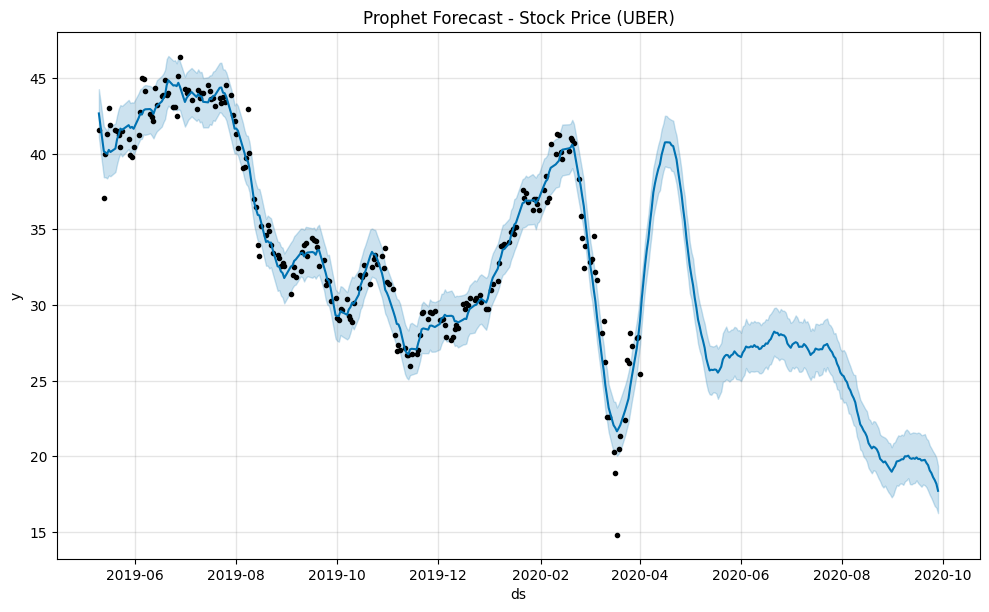

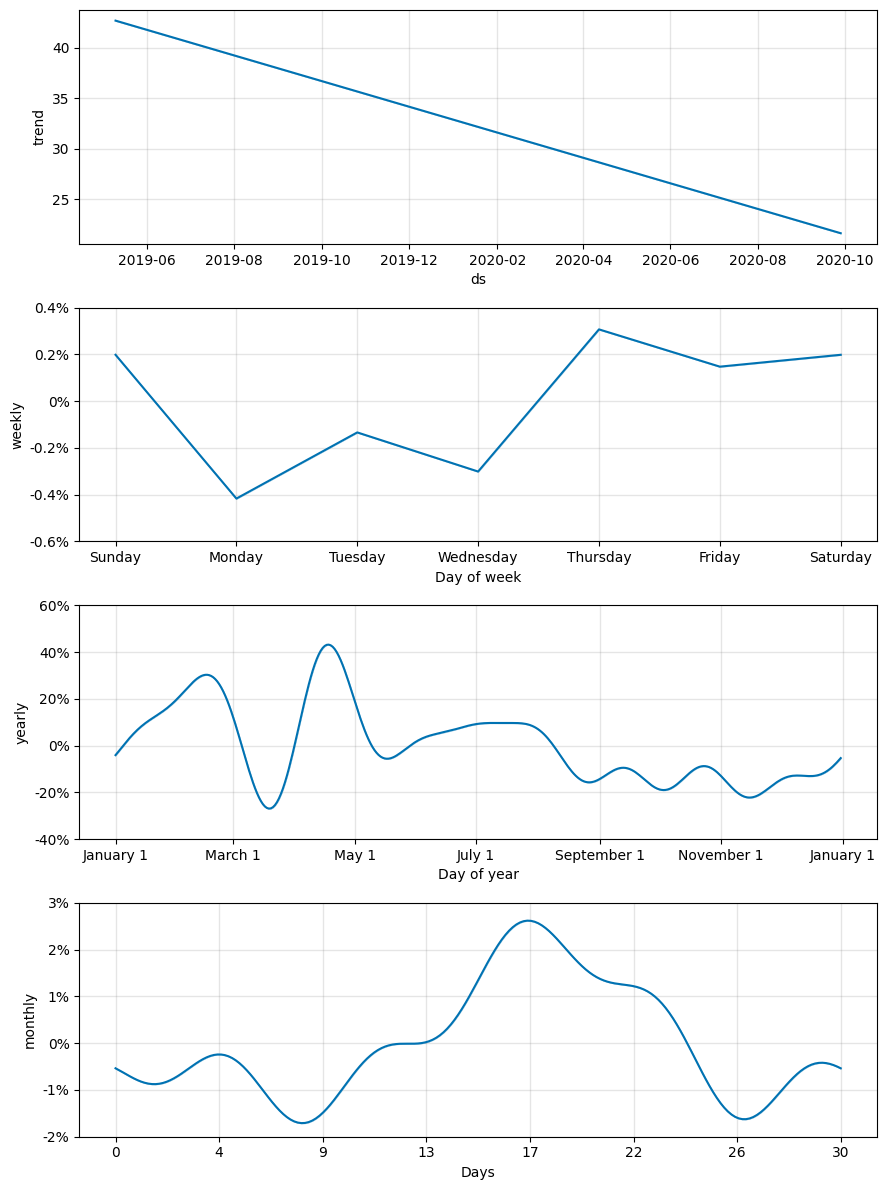

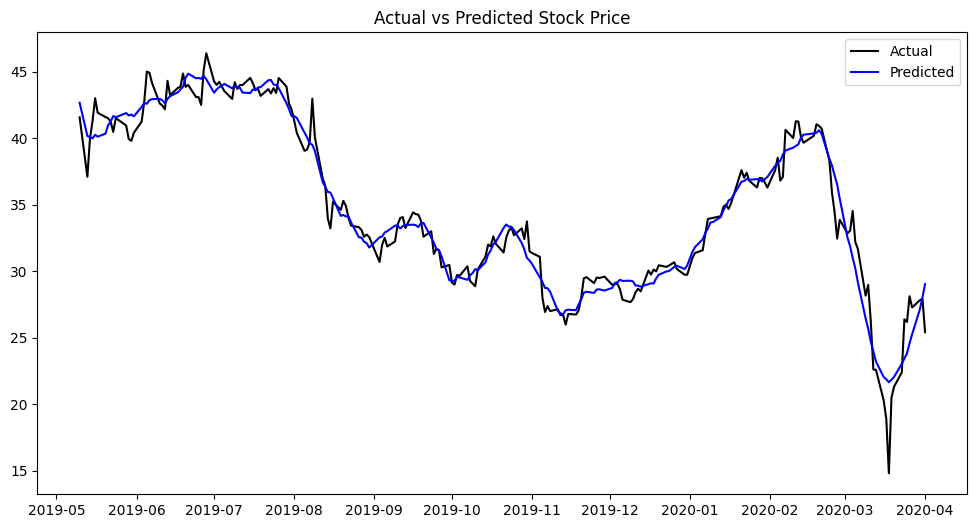

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


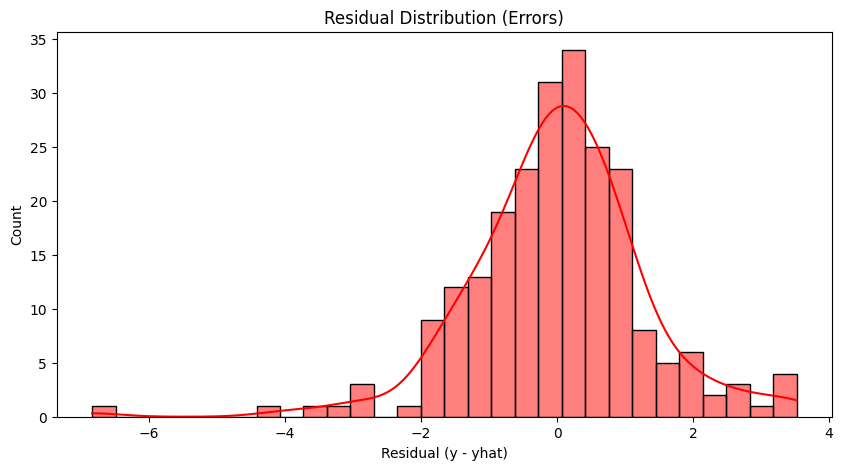

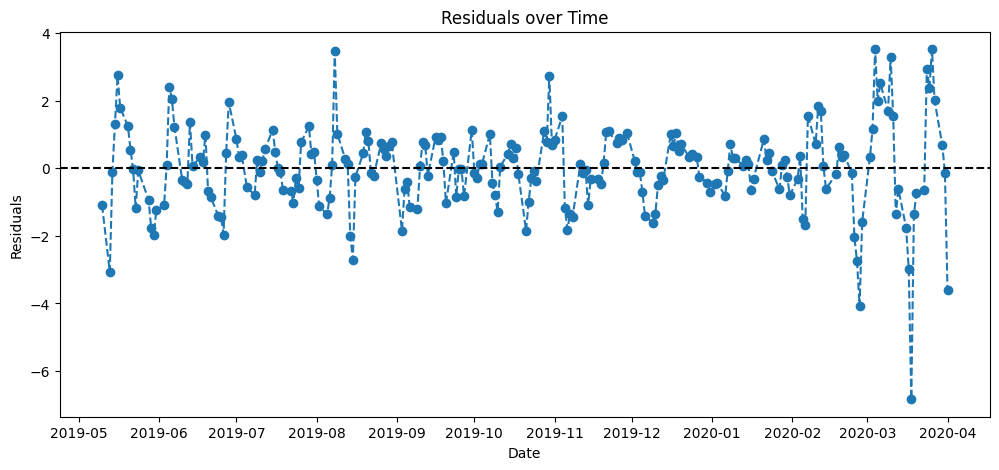

In [11]:
# STEP 6: Metrics

mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
rmse = np.sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))
mape = np.mean(np.abs((eval_df['y'] - eval_df['yhat']) / eval_df['y'])) * 100

print(f"\n📊 Model Performance on Historical Data:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")

# STEP 7: Visualization

# Prophet default forecast plot
fig1 = model.plot(forecast)
plt.title("Prophet Forecast - Stock Price (UBER)")
plt.show()

# Prophet components (trend, weekly, yearly, monthly)
fig2 = model.plot_components(forecast)
plt.show()

# Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(eval_df['ds'], eval_df['y'], label="Actual", color='black')
plt.plot(eval_df['ds'], eval_df['yhat'], label="Predicted", color='blue')
plt.title("Actual vs Predicted Stock Price")
plt.legend()
plt.show()

# Residuals plot
residuals = eval_df['y'] - eval_df['yhat']
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True, bins=30, color="red")
plt.title("Residual Distribution (Errors)")
plt.xlabel("Residual (y - yhat)")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(eval_df['ds'], residuals, marker='o', linestyle='dashed')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

09:17:21 - cmdstanpy - INFO - Chain [1] start processing
09:17:21 - cmdstanpy - INFO - Chain [1] done processing



🔮 Processing UBER ...


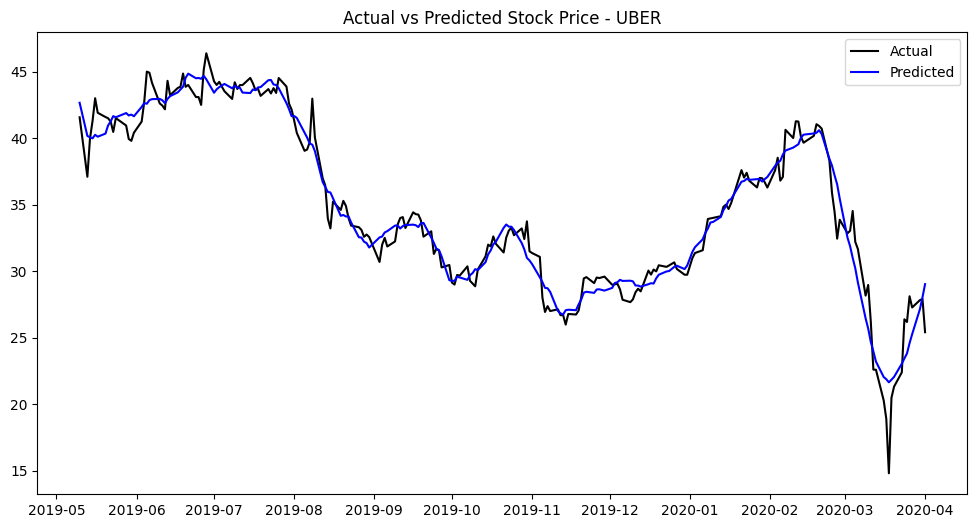

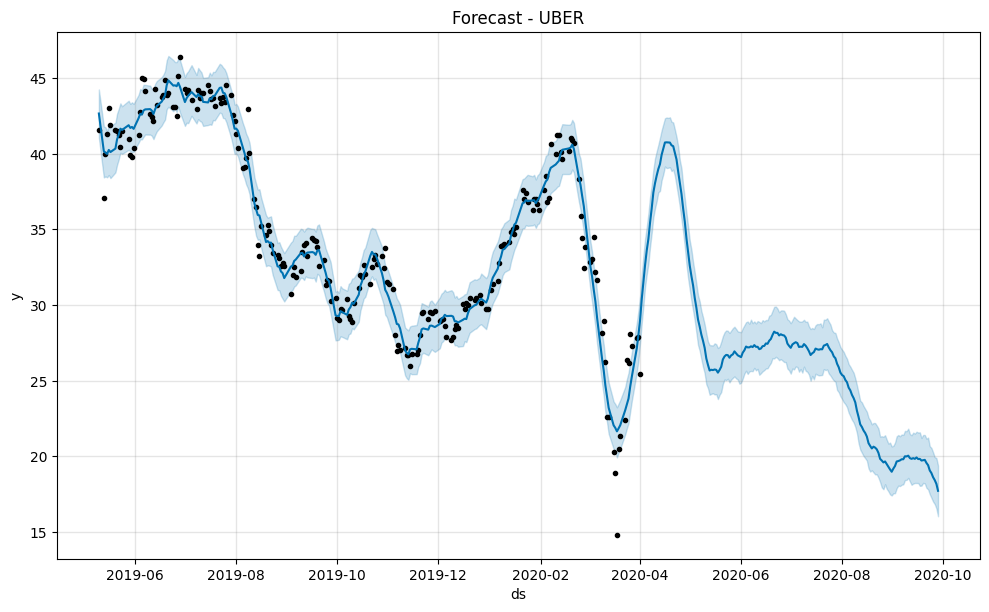

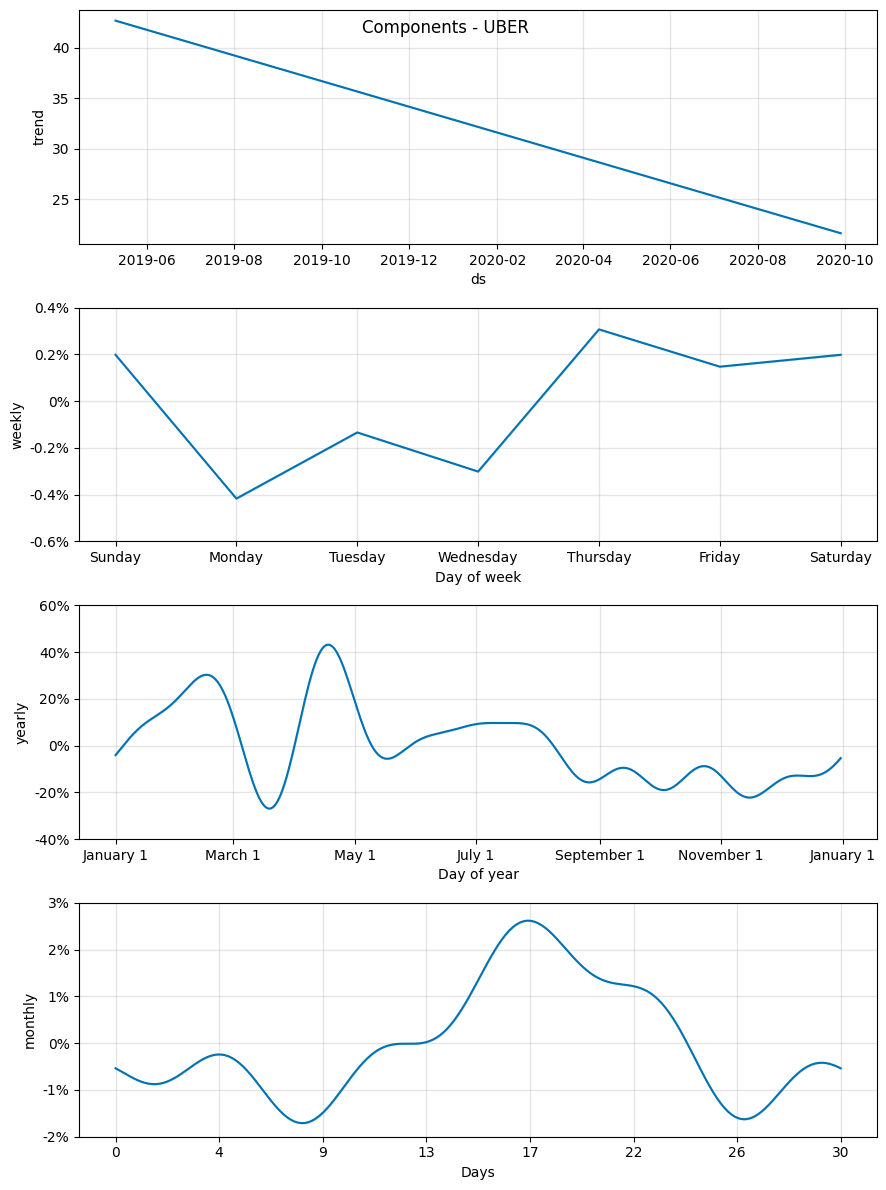

09:17:23 - cmdstanpy - INFO - Chain [1] start processing
09:17:23 - cmdstanpy - INFO - Chain [1] done processing



🔮 Processing ZM ...


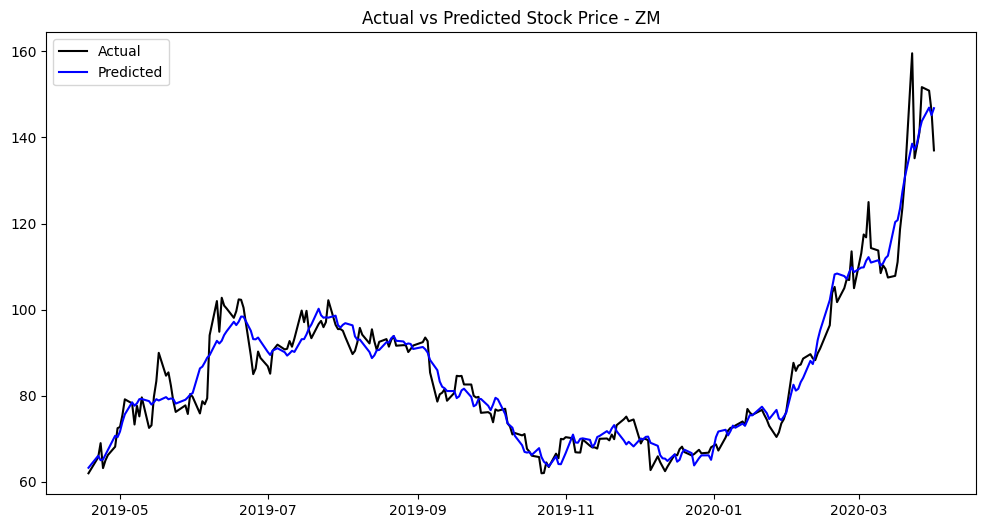

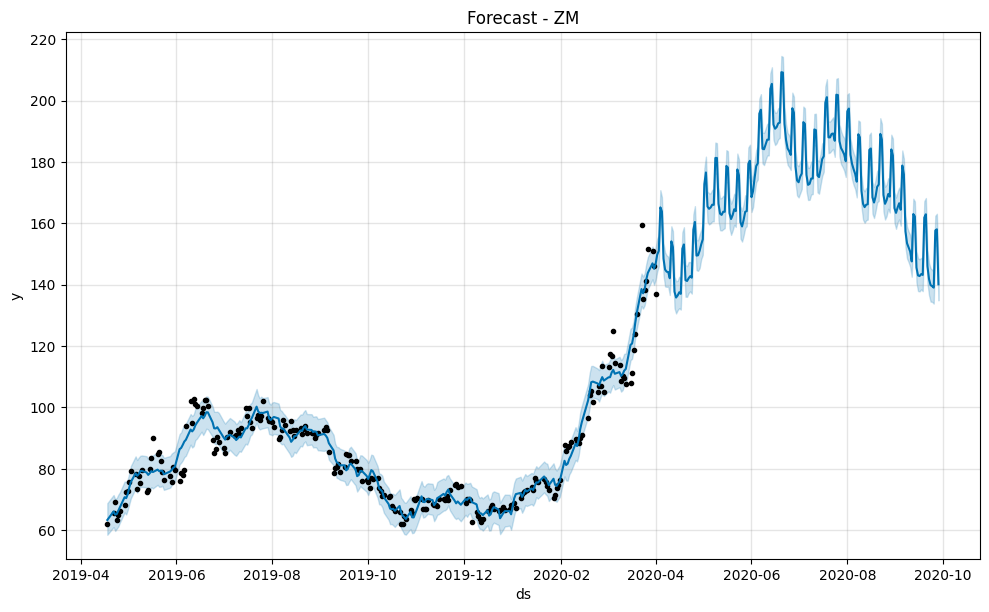

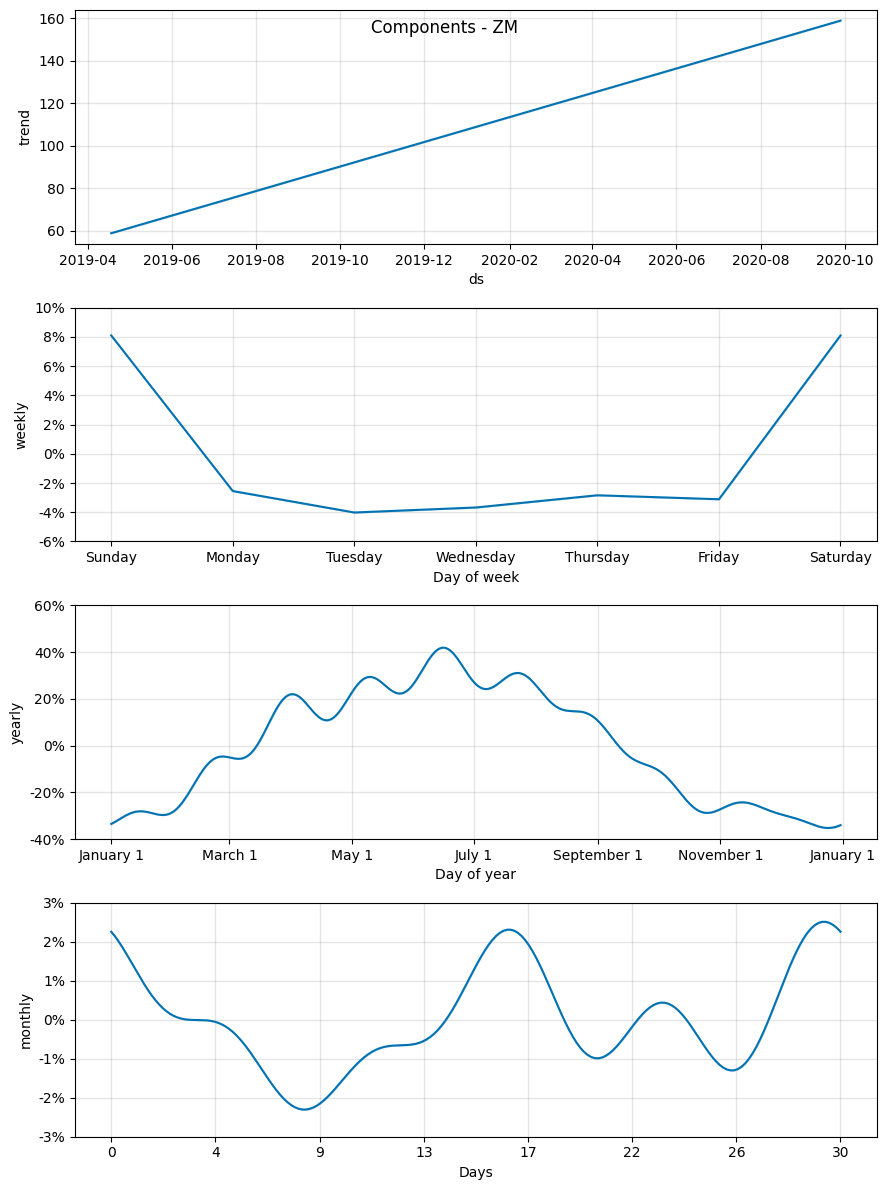

09:17:24 - cmdstanpy - INFO - Chain [1] start processing



🔮 Processing AMSF ...


09:17:29 - cmdstanpy - INFO - Chain [1] done processing


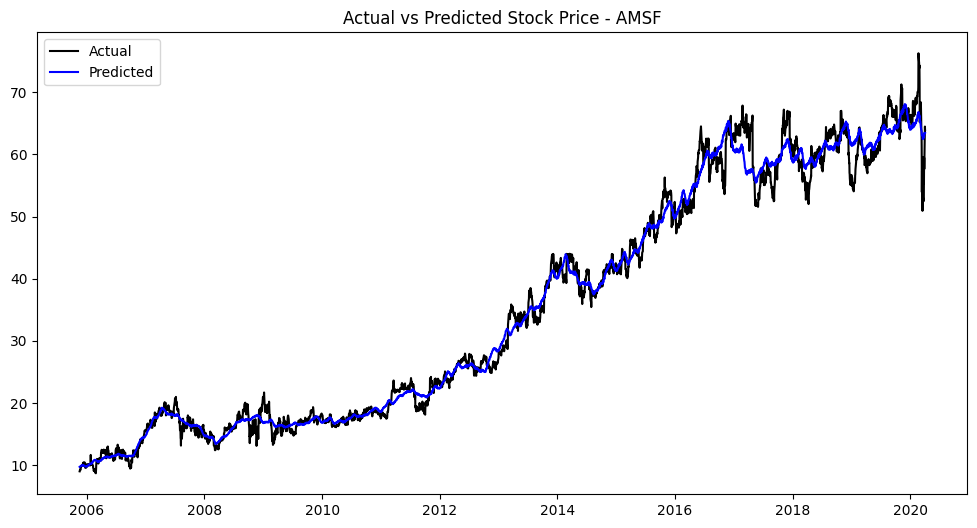

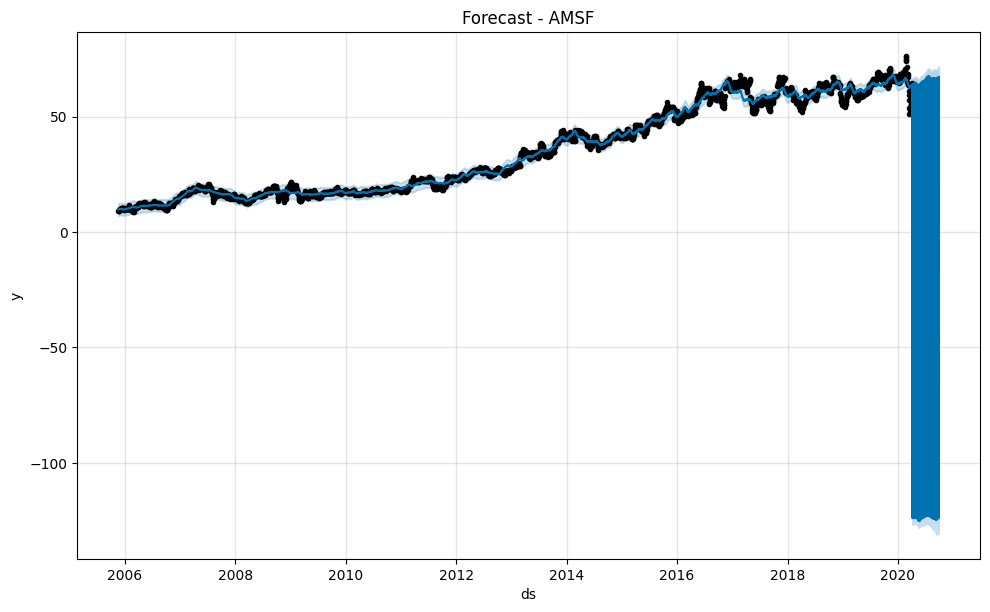

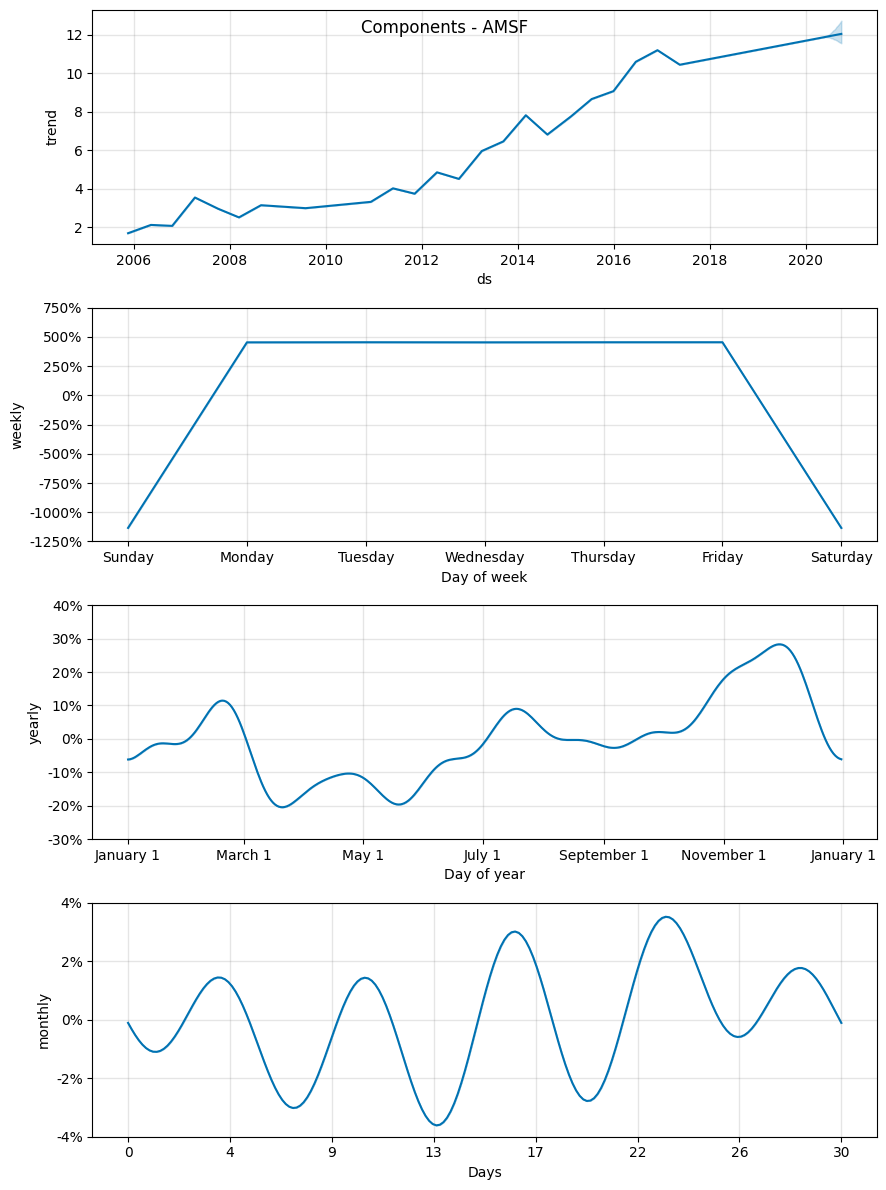


📊 Model Performance Summary:
  Stock       MAE      RMSE      MAPE
0  UBER  0.918513  1.279614  2.896571
1    ZM  2.861154  3.975085  3.287396
2  AMSF  1.462199  2.069418  4.435823


In [12]:
# STEP 8: Run for multiple stocks

stock_files = [
    "/kaggle/input/stock-market-dataset/stocks/UBER.csv",
    "/kaggle/input/stock-market-dataset/stocks/ZM.csv",
    "/kaggle/input/stock-market-dataset/stocks/AMSF.csv"
]

results = []

for stock_path in stock_files:
    ticker = os.path.basename(stock_path).replace(".csv","")
    print(f"\n🔮 Processing {ticker} ...")

    # Load & prepare
    df = pd.read_csv(stock_path)
    data = df[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
    data['ds'] = pd.to_datetime(data['ds'])

    # Prophet model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_mode='multiplicative'
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(data)

    # Forecast
    future = model.make_future_dataframe(periods=180)
    forecast = model.predict(future)

    # Evaluate
    merged = pd.merge(forecast[['ds','yhat']], data, on='ds', how='left')
    eval_df = merged.dropna()
    mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
    rmse = np.sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))
    mape = np.mean(np.abs((eval_df['y'] - eval_df['yhat']) / eval_df['y'])) * 100

    results.append([ticker, mae, rmse, mape])

    # Plot Actual vs Forecast
    plt.figure(figsize=(12,6))
    plt.plot(eval_df['ds'], eval_df['y'], label="Actual", color='black')
    plt.plot(eval_df['ds'], eval_df['yhat'], label="Predicted", color='blue')
    plt.title(f"Actual vs Predicted Stock Price - {ticker}")
    plt.legend()
    plt.show()

    # Prophet forecast + components
    model.plot(forecast)
    plt.title(f"Forecast - {ticker}")
    plt.show()

    model.plot_components(forecast)
    plt.suptitle(f"Components - {ticker}")
    plt.show()

# STEP 9: Summary table

metrics_df = pd.DataFrame(results, columns=["Stock","MAE","RMSE","MAPE"])
print("\n📊 Model Performance Summary:")
print(metrics_df)

In [13]:
# STEP 8: Run for multiple stocks (example: 10 files)

import glob

# Get all stock CSVs
stock_files = glob.glob("/kaggle/input/stock-market-dataset/stocks/*.csv")

# Pick first 10
stock_files = stock_files[:10]

results = []

for file in stock_files:
    stock_name = file.split("/")[-1].replace(".csv", "")
    print(f"\n🔹 Processing {stock_name} ...")

    # Load & prepare data
    df = pd.read_csv(file)
    data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    data['ds'] = pd.to_datetime(data['ds'])

    # Model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_mode='multiplicative'
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(data)

    # Forecast
    future = model.make_future_dataframe(periods=180)
    forecast = model.predict(future)

    # Evaluation
    merged = pd.merge(forecast[['ds','yhat']], data, on='ds', how='left')
    eval_df = merged.dropna()

    mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
    rmse = np.sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))
    mape = np.mean(np.abs((eval_df['y'] - eval_df['yhat']) / eval_df['y'])) * 100

    results.append([stock_name, mae, rmse, mape])

    # Save plots for each stock
    fig1 = model.plot(forecast)
    plt.title(f"Forecast - {stock_name}")
    plt.savefig(f"/kaggle/working/{stock_name}_forecast.png")
    plt.close()

    fig2 = model.plot_components(forecast)
    plt.savefig(f"/kaggle/working/{stock_name}_components.png")
    plt.close()

# STEP 9: Collect Metrics

metrics_df = pd.DataFrame(results, columns=["Stock", "MAE", "RMSE", "MAPE"])
print("\n📊 Metrics for 10 stocks:")
print(metrics_df)

# Save metrics
metrics_df.to_csv("/kaggle/working/stock_forecast_metrics.csv", index=False)


09:19:32 - cmdstanpy - INFO - Chain [1] start processing



🔹 Processing MTL ...


09:19:40 - cmdstanpy - INFO - Chain [1] done processing



🔹 Processing JOE ...


09:19:42 - cmdstanpy - INFO - Chain [1] start processing
09:19:55 - cmdstanpy - INFO - Chain [1] done processing



🔹 Processing DRE ...


09:19:58 - cmdstanpy - INFO - Chain [1] start processing
09:20:09 - cmdstanpy - INFO - Chain [1] done processing
09:20:11 - cmdstanpy - INFO - Chain [1] start processing



🔹 Processing CTY ...


09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1] start processing



🔹 Processing AMSF ...


09:20:20 - cmdstanpy - INFO - Chain [1] done processing



🔹 Processing IMH ...


09:20:22 - cmdstanpy - INFO - Chain [1] start processing
09:20:34 - cmdstanpy - INFO - Chain [1] done processing
09:20:36 - cmdstanpy - INFO - Chain [1] start processing



🔹 Processing GFL ...


09:20:36 - cmdstanpy - INFO - Chain [1] done processing
09:20:38 - cmdstanpy - INFO - Chain [1] start processing



🔹 Processing CLM ...


09:20:46 - cmdstanpy - INFO - Chain [1] done processing
09:20:48 - cmdstanpy - INFO - Chain [1] start processing
09:20:48 - cmdstanpy - INFO - Chain [1] done processing



🔹 Processing UBER ...


09:20:49 - cmdstanpy - INFO - Chain [1] start processing



🔹 Processing NEBU ...


09:20:50 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrics for 10 stocks:
  Stock        MAE       RMSE         MAPE
0   MTL   2.191162   3.532487    17.381296
1   JOE   2.086897   2.953552     8.221481
2   DRE   1.187288   1.681045     6.556085
3   CTY   0.492070   0.833236     2.249472
4  AMSF   1.462199   2.069418     4.435823
5   IMH   5.183595   8.749719    23.120178
6   GFL  15.149192  25.002959  2292.160883
7   CLM   3.384563   5.474173     6.432638
8  UBER   0.918513   1.279614     2.896571
9  NEBU   0.057600   0.105480     0.565867


In [14]:
import os

# Define the path you want to inspect
path = '/kaggle/working/'

# Check if the path exists to avoid errors
if os.path.exists(path):
    # Get a list of all files and directories in the specified path
    contents = os.listdir(path)
    
    # Print the contents
    if contents:
        print(f"Contents of {path}:")
        for item in contents:
            print(f"- {item}")
    else:
        print(f"The directory {path} is empty.")
else:
    print(f"The directory {path} does not exist.")

Contents of /kaggle/working/:
- DRE_components.png
- CTY_components.png
- CLM_forecast.png
- NEBU_components.png
- JOE_forecast.png
- NEBU_forecast.png
- UBER_forecast.png
- DRE_forecast.png
- GFL_components.png
- AMSF_components.png
- .virtual_documents
- MTL_forecast.png
- stock_forecast_metrics.csv
- UBER_components.png
- CTY_forecast.png
- IMH_forecast.png
- JOE_components.png
- AMSF_forecast.png
- GFL_forecast.png
- MTL_components.png
- CLM_components.png
- IMH_components.png


Found 20 images. Displaying them now:


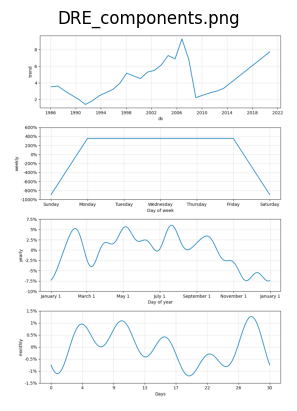

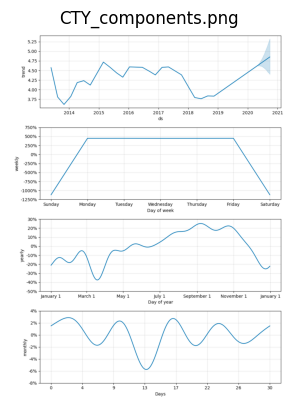

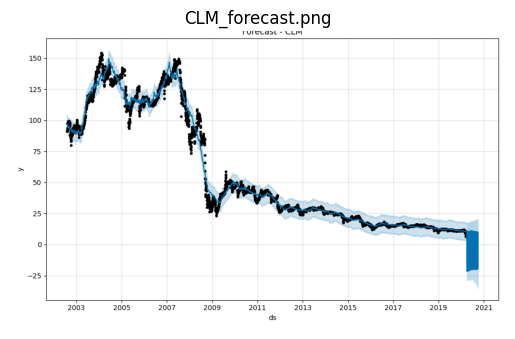

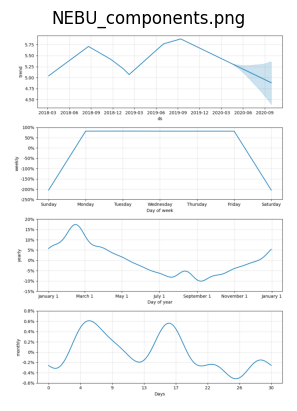

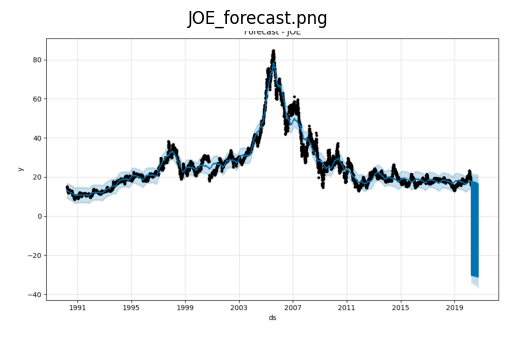

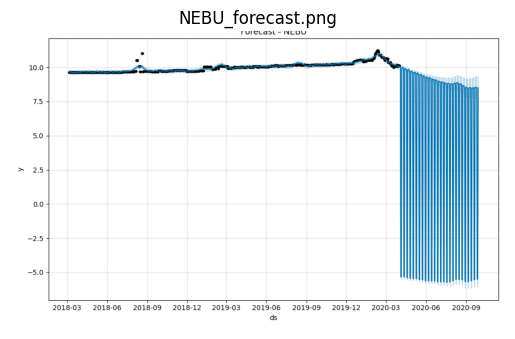

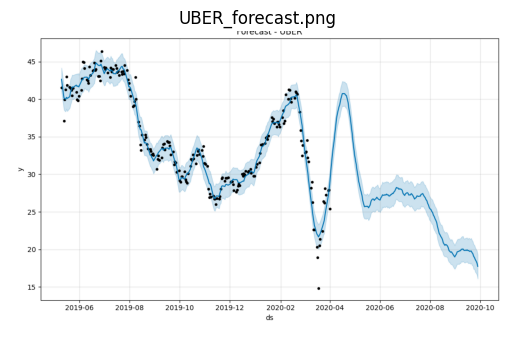

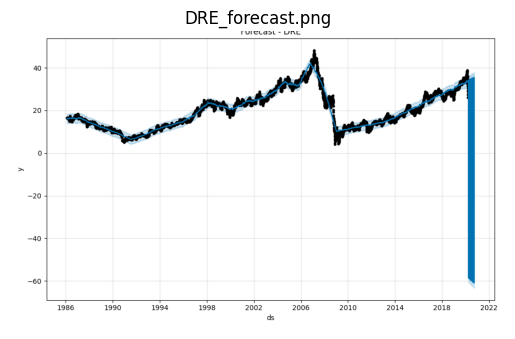

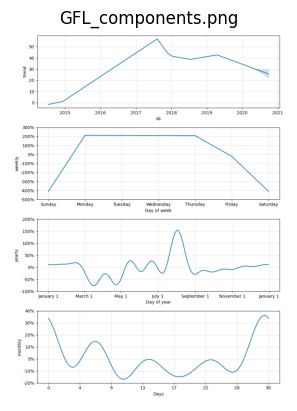

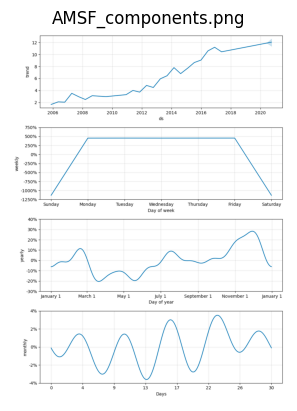

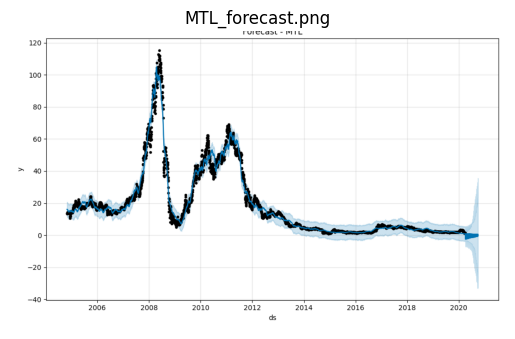

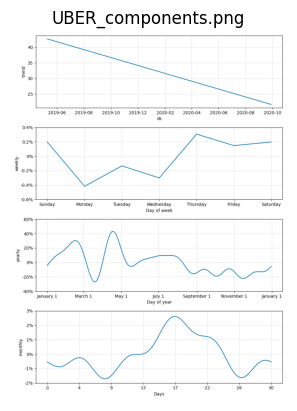

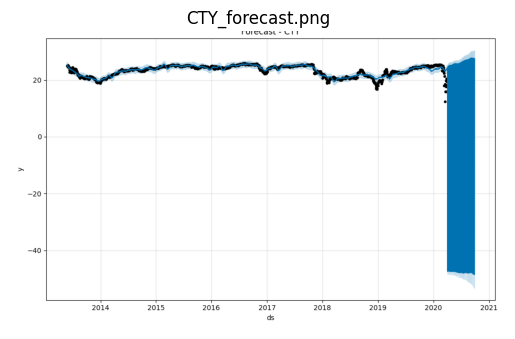

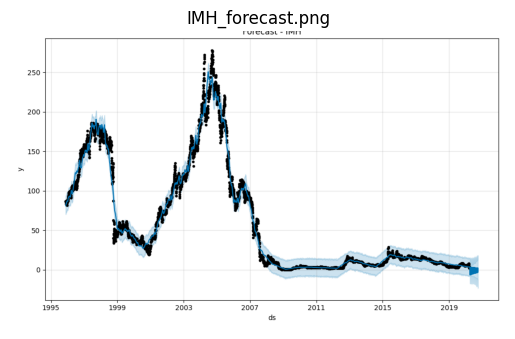

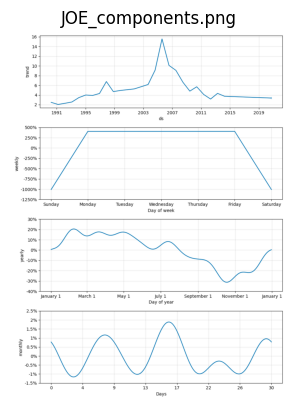

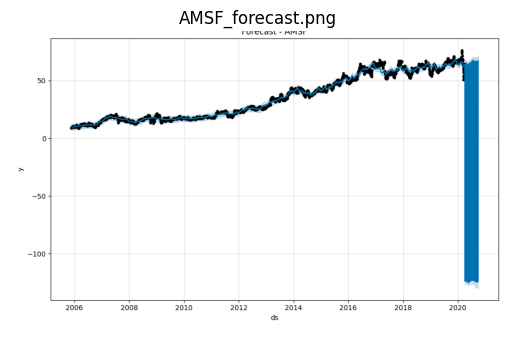

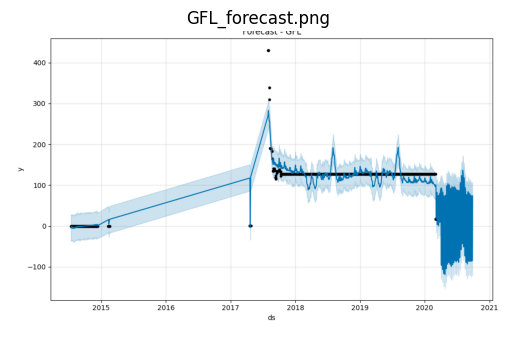

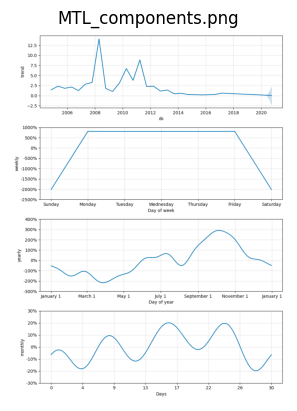

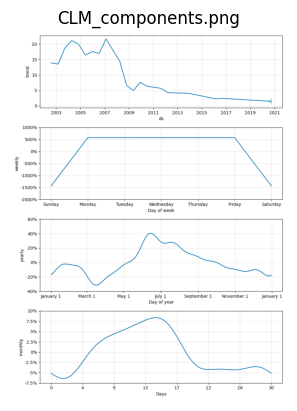

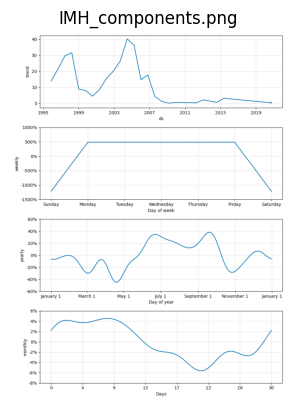

In [15]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory
directory = '/kaggle/working/'

# Get the list of all files in the directory
files = os.listdir(directory)

# Filter for image files
image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display each image
if image_files:
    print(f"Found {len(image_files)} images. Displaying them now:")
    for image_name in image_files:
        image_path = os.path.join(directory, image_name)
        try:
            # Open the image using PIL
            img = Image.open(image_path)
            
            # Display the image using matplotlib
            plt.imshow(img)
            plt.title(image_name) # Set the title of the plot to the image filename
            plt.axis('off')       # Turn off the axis labels for a cleaner look
            plt.show()            # Display the plot
            
        except Exception as e:
            print(f"Could not open or display {image_name}: {e}")
else:
    print("No image files found in the specified directory.")

09:24:52 - cmdstanpy - INFO - Chain [1] start processing



📈 Showing graphs for MTL...


09:25:00 - cmdstanpy - INFO - Chain [1] done processing


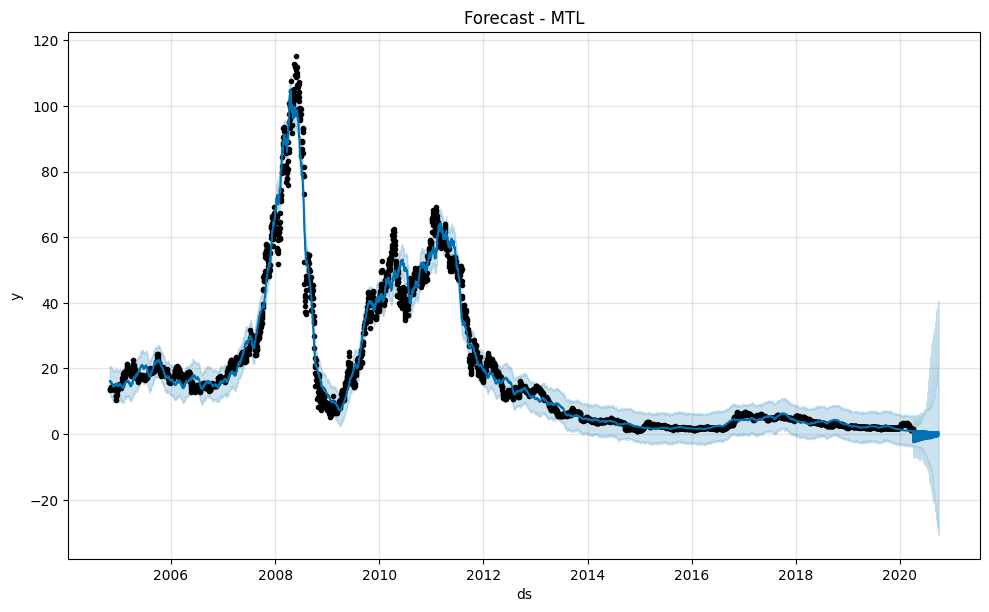

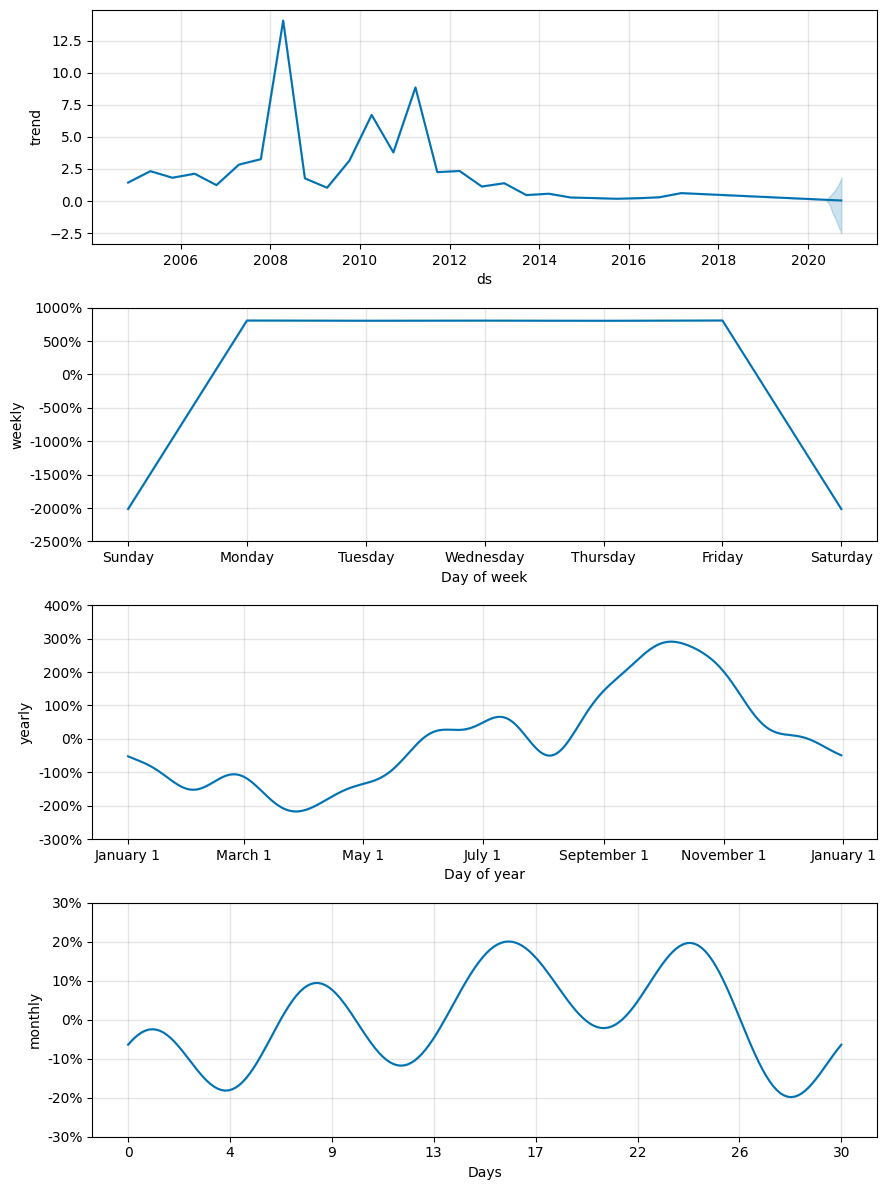


📈 Showing graphs for JOE...


09:25:02 - cmdstanpy - INFO - Chain [1] start processing
09:25:16 - cmdstanpy - INFO - Chain [1] done processing


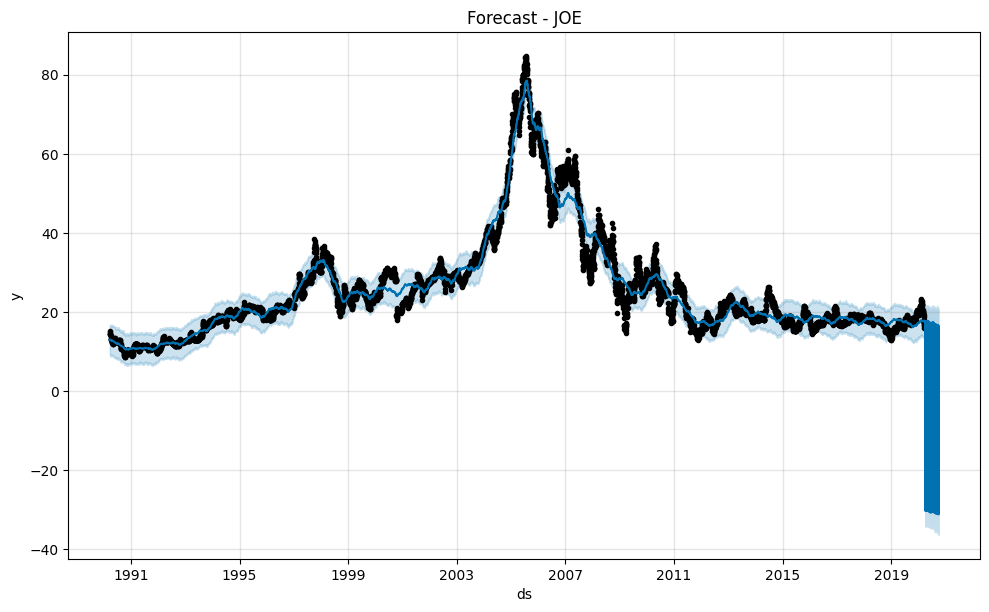

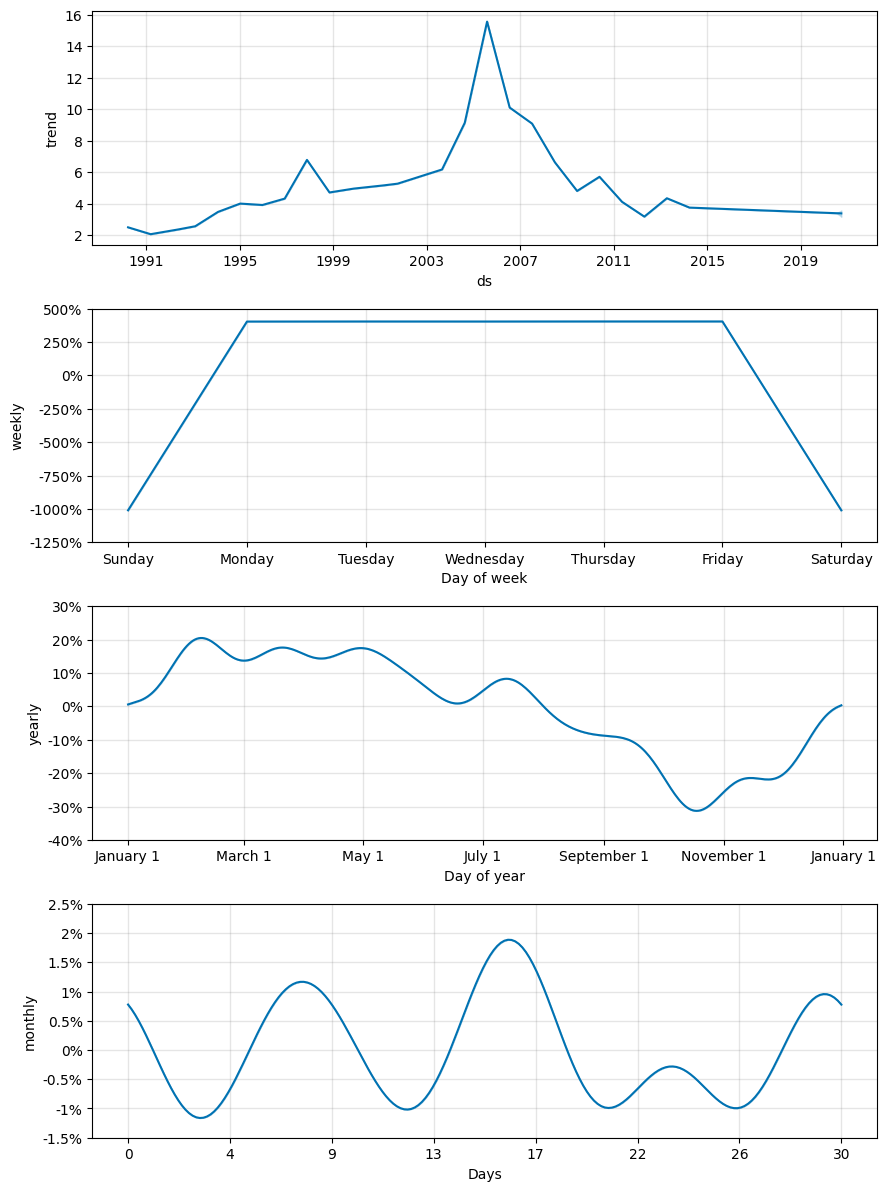


📈 Showing graphs for DRE...


09:25:19 - cmdstanpy - INFO - Chain [1] start processing
09:25:29 - cmdstanpy - INFO - Chain [1] done processing


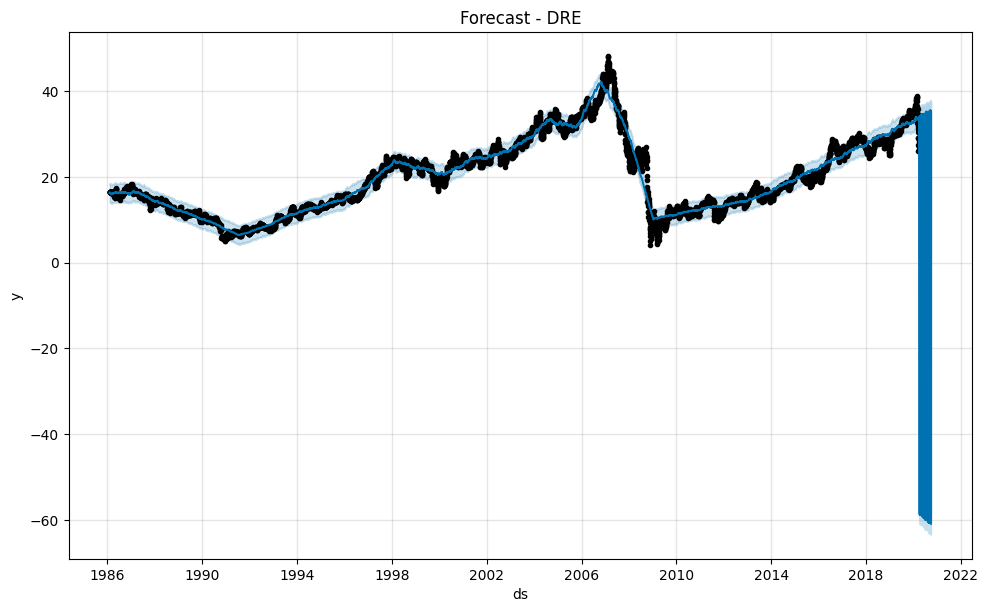

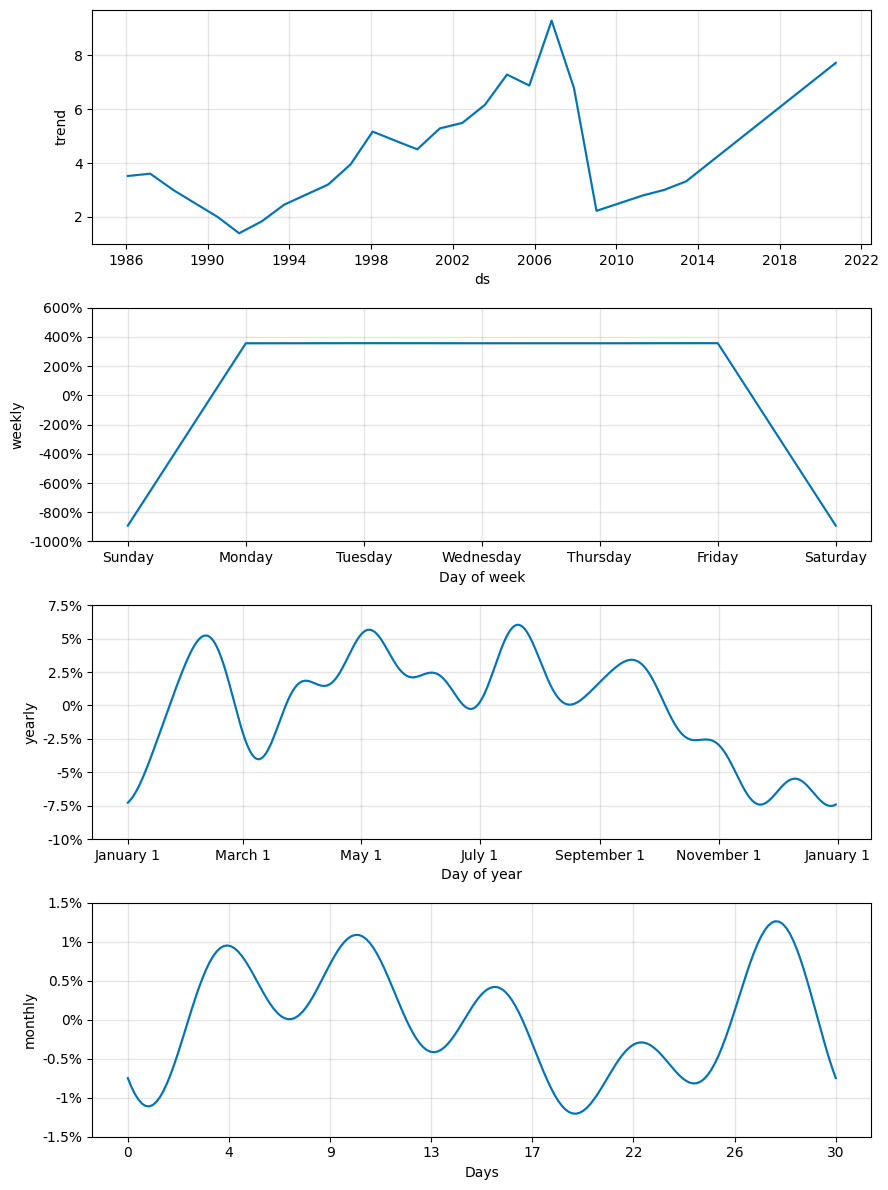

09:25:32 - cmdstanpy - INFO - Chain [1] start processing



📈 Showing graphs for CTY...


09:25:34 - cmdstanpy - INFO - Chain [1] done processing


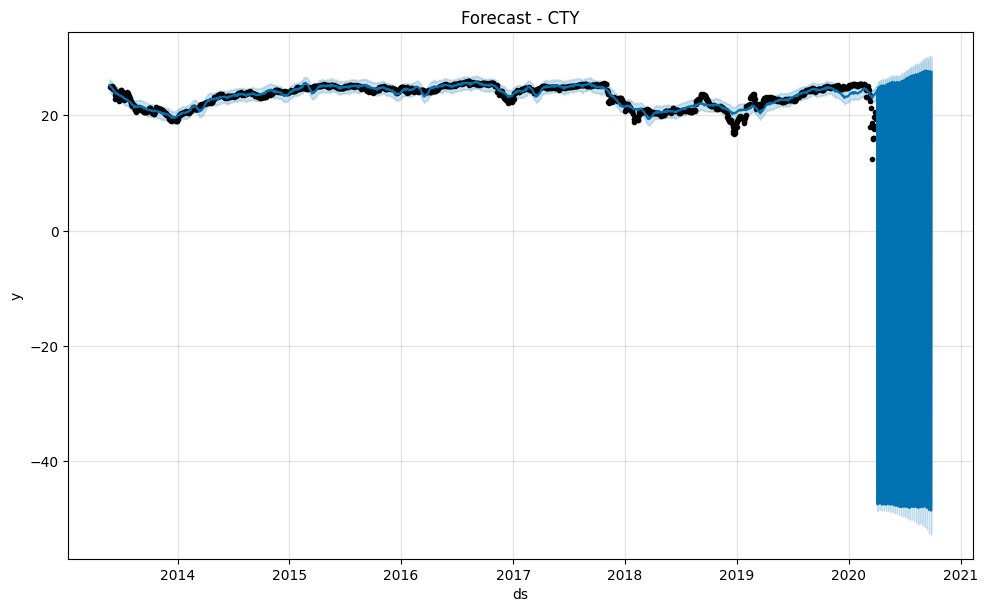

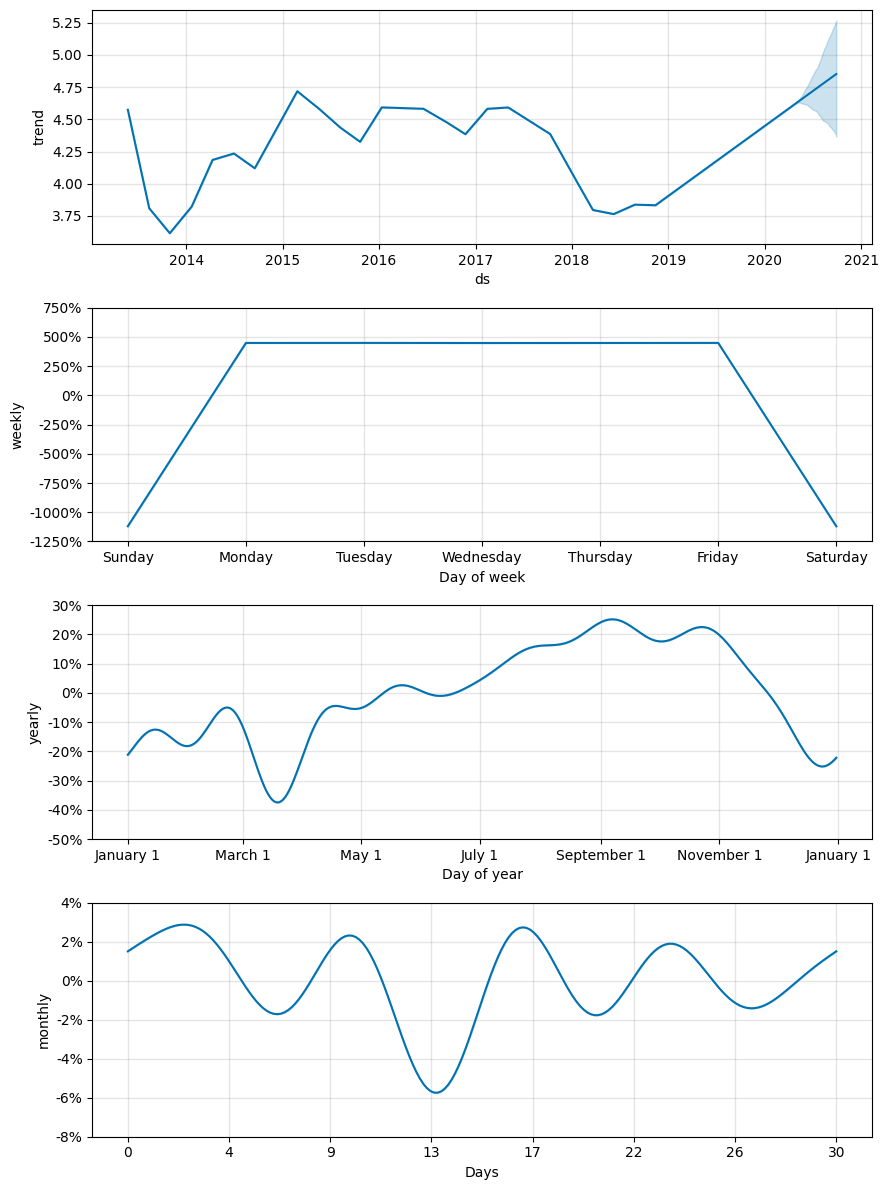

09:25:36 - cmdstanpy - INFO - Chain [1] start processing



📈 Showing graphs for AMSF...


09:25:40 - cmdstanpy - INFO - Chain [1] done processing


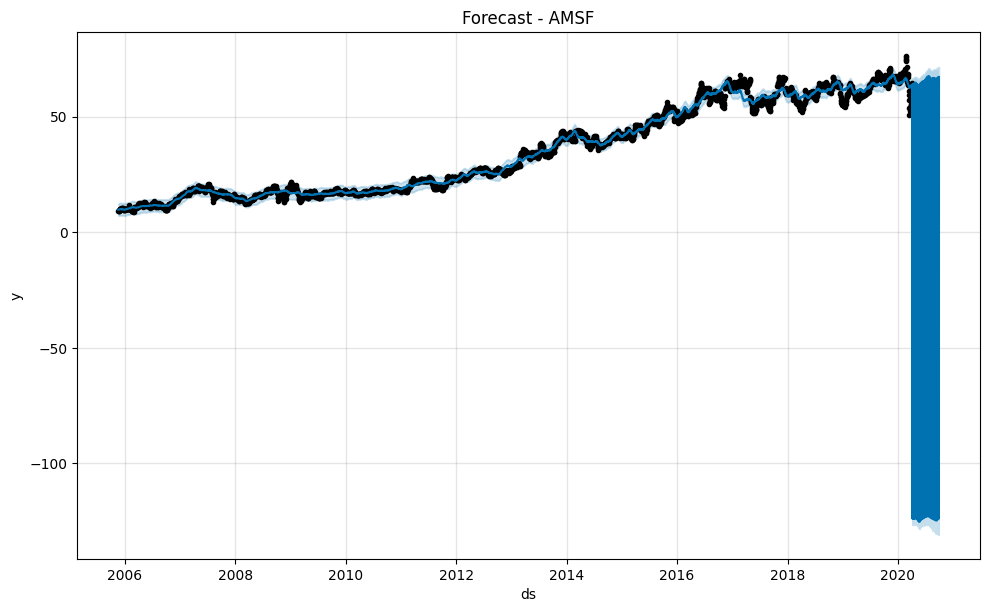

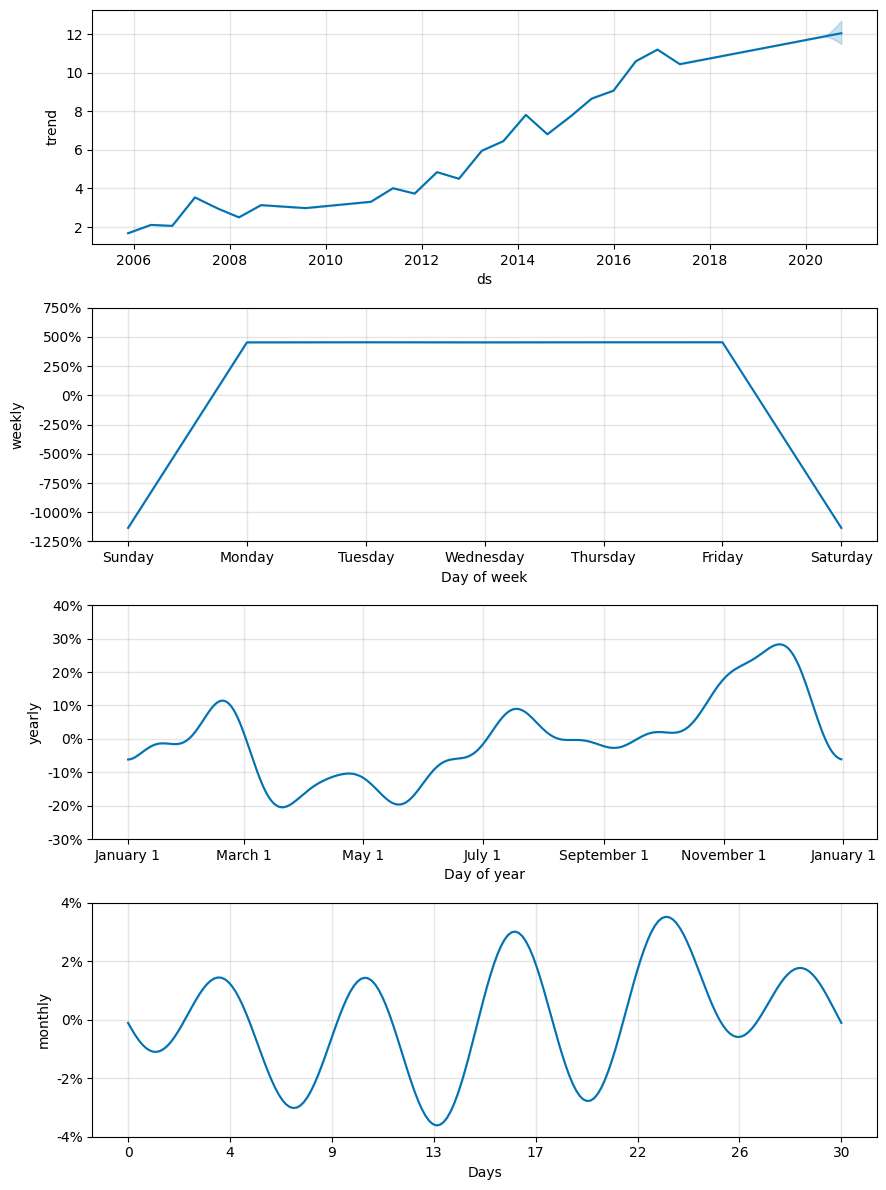


📈 Showing graphs for IMH...


09:25:42 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] done processing


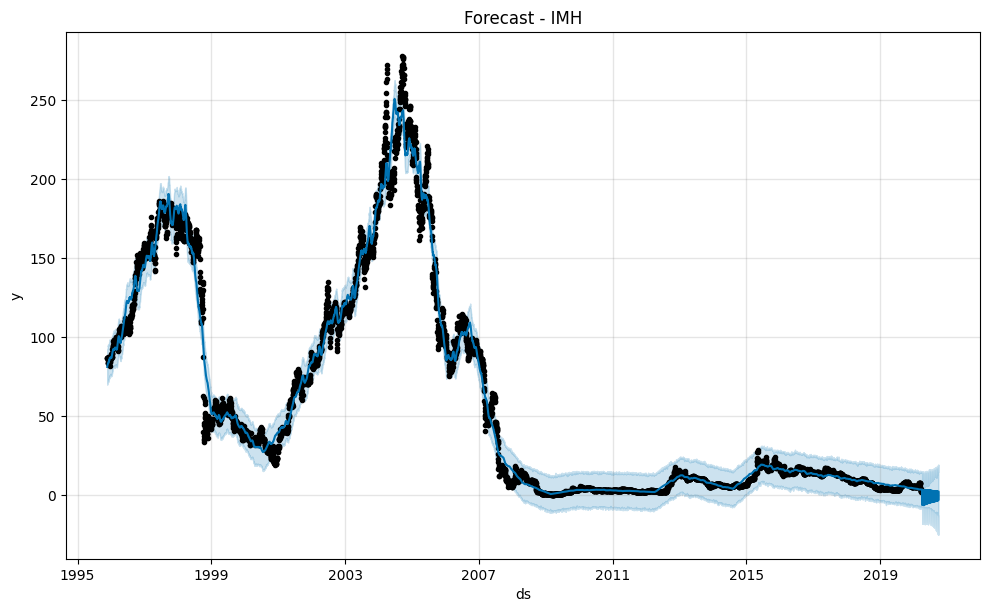

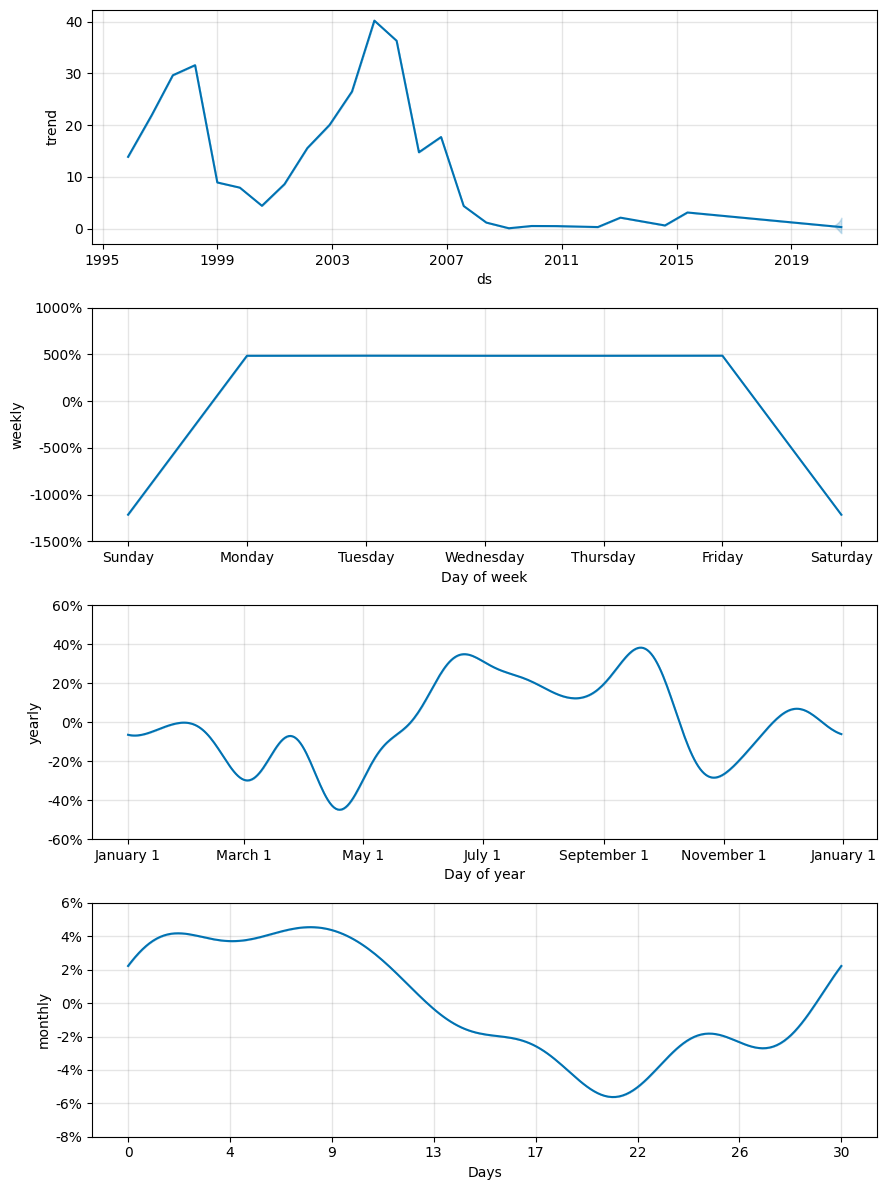


📈 Showing graphs for GFL...


09:25:56 - cmdstanpy - INFO - Chain [1] start processing
09:25:56 - cmdstanpy - INFO - Chain [1] done processing


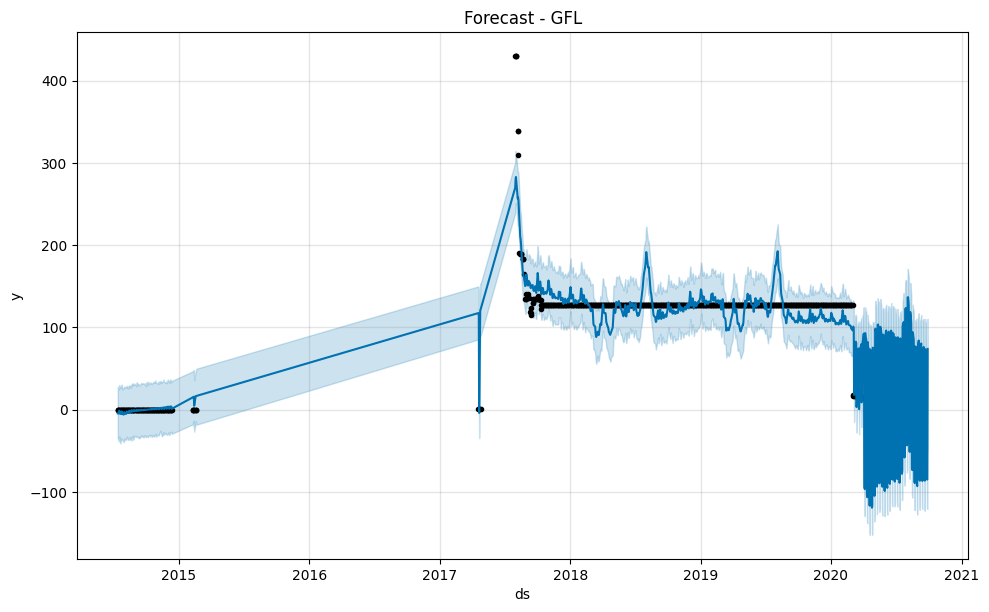

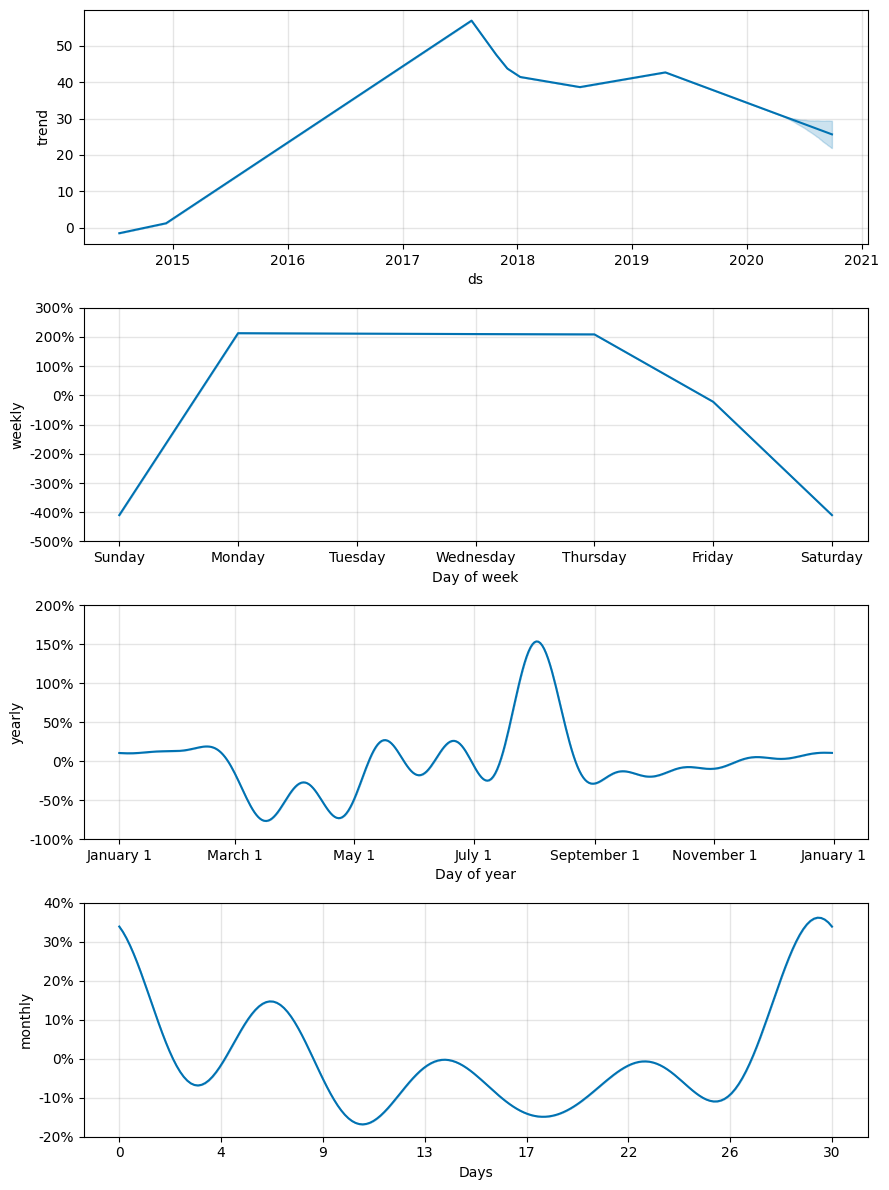

09:25:57 - cmdstanpy - INFO - Chain [1] start processing



📈 Showing graphs for CLM...


09:26:06 - cmdstanpy - INFO - Chain [1] done processing


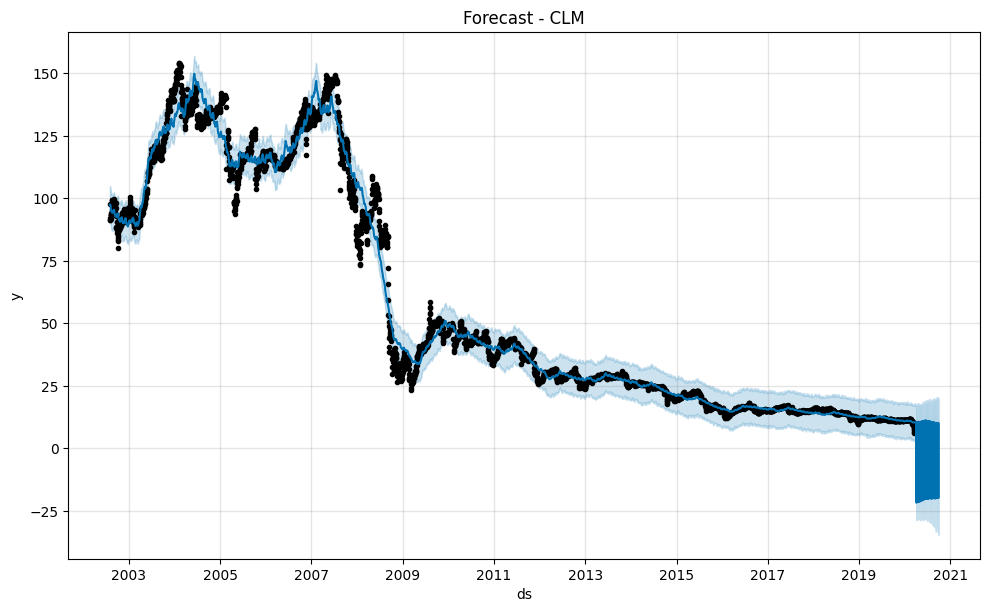

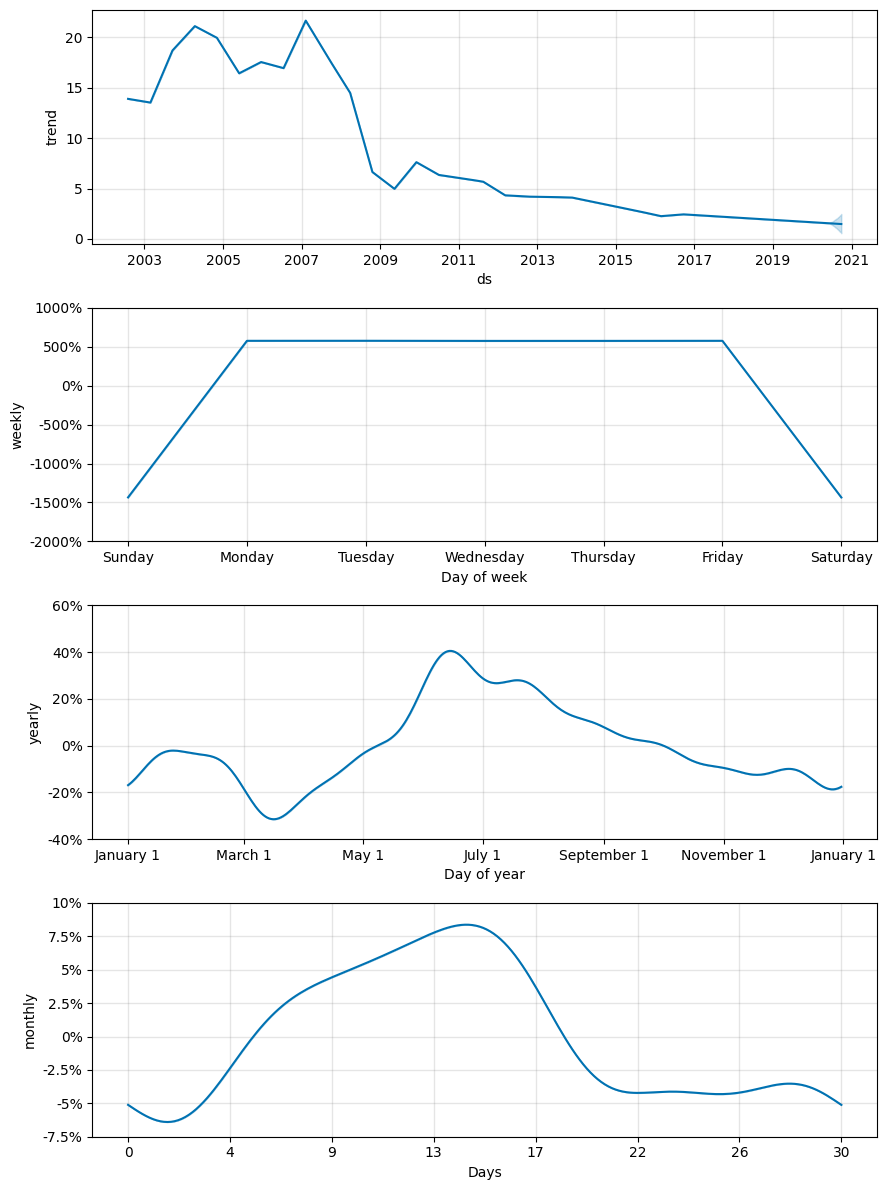

09:26:08 - cmdstanpy - INFO - Chain [1] start processing
09:26:08 - cmdstanpy - INFO - Chain [1] done processing



📈 Showing graphs for UBER...


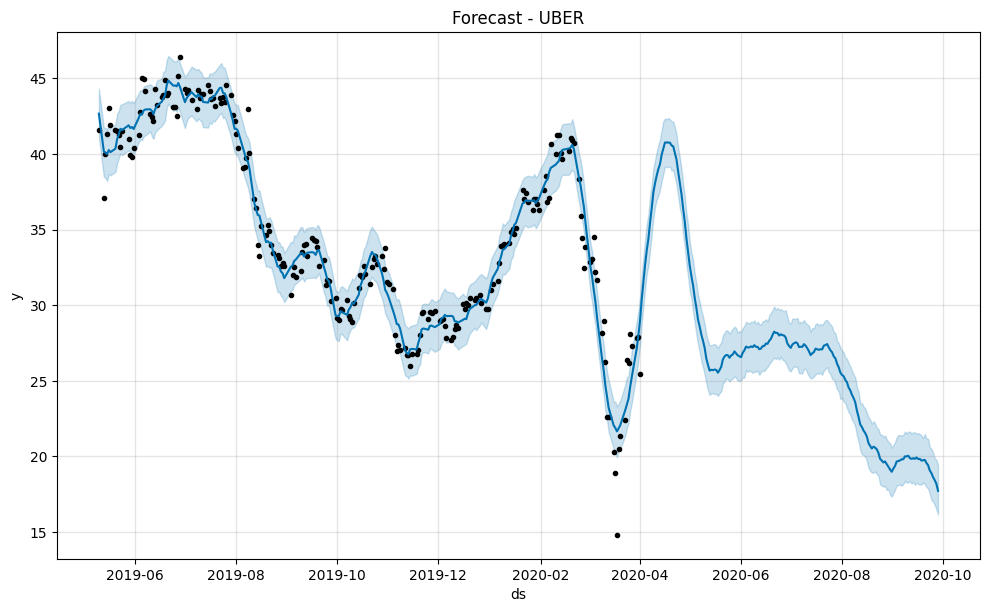

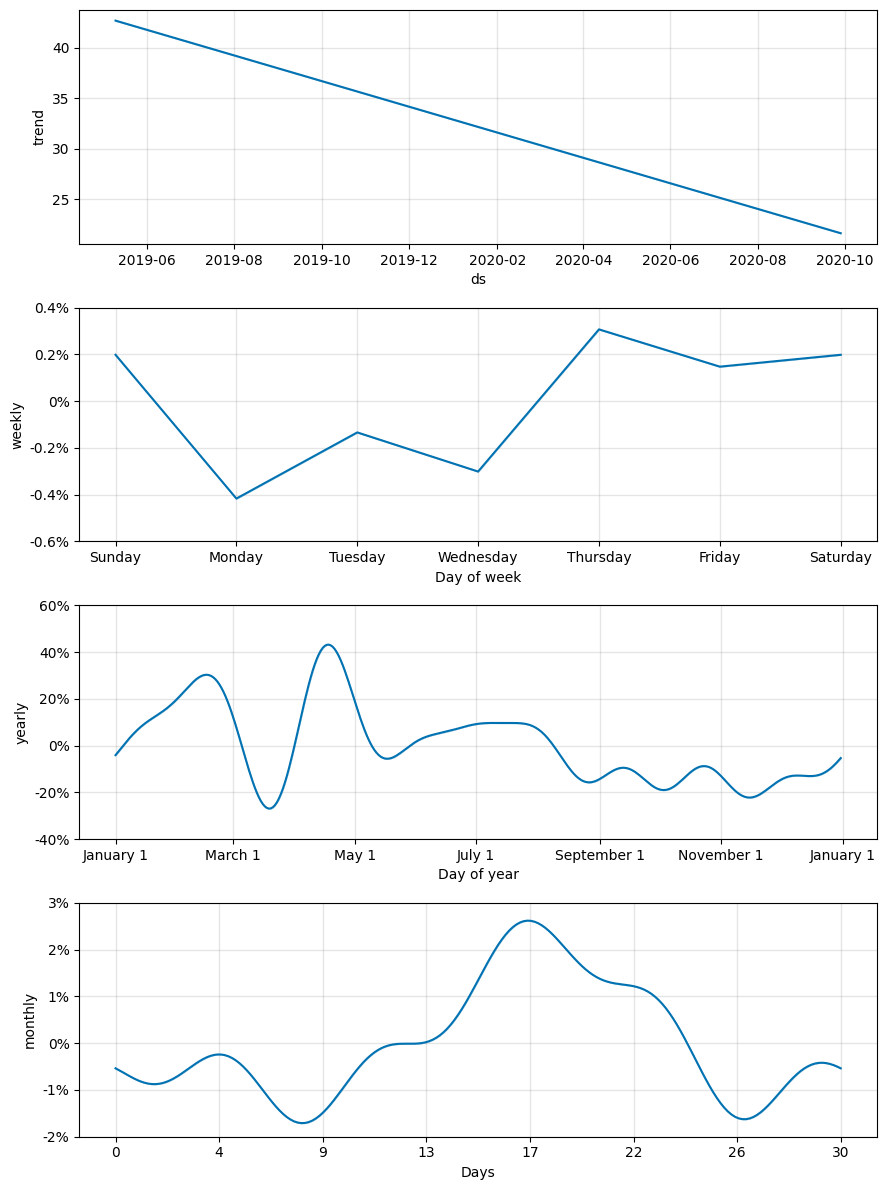

09:26:09 - cmdstanpy - INFO - Chain [1] start processing



📈 Showing graphs for NEBU...


09:26:09 - cmdstanpy - INFO - Chain [1] done processing


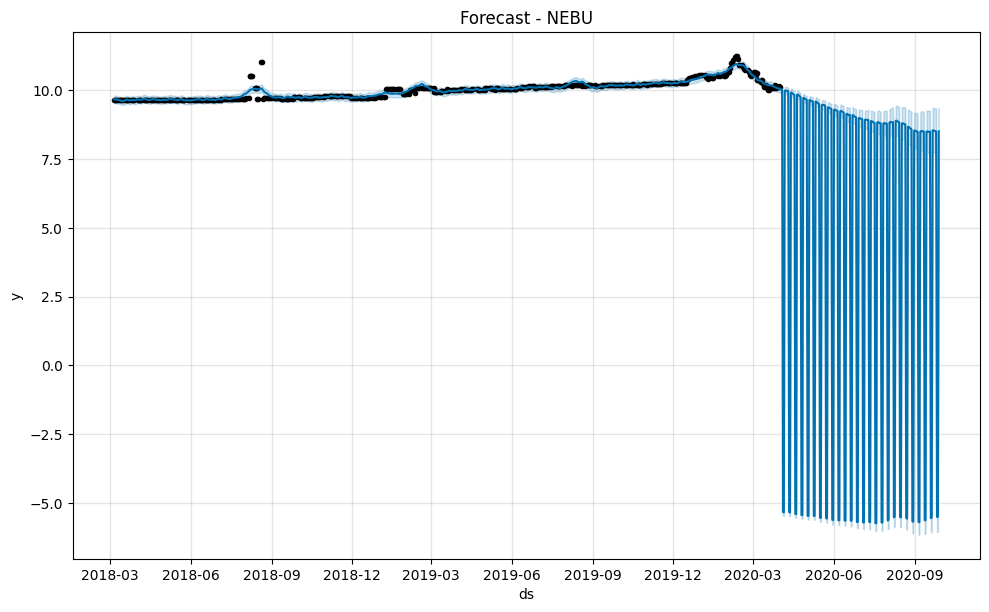

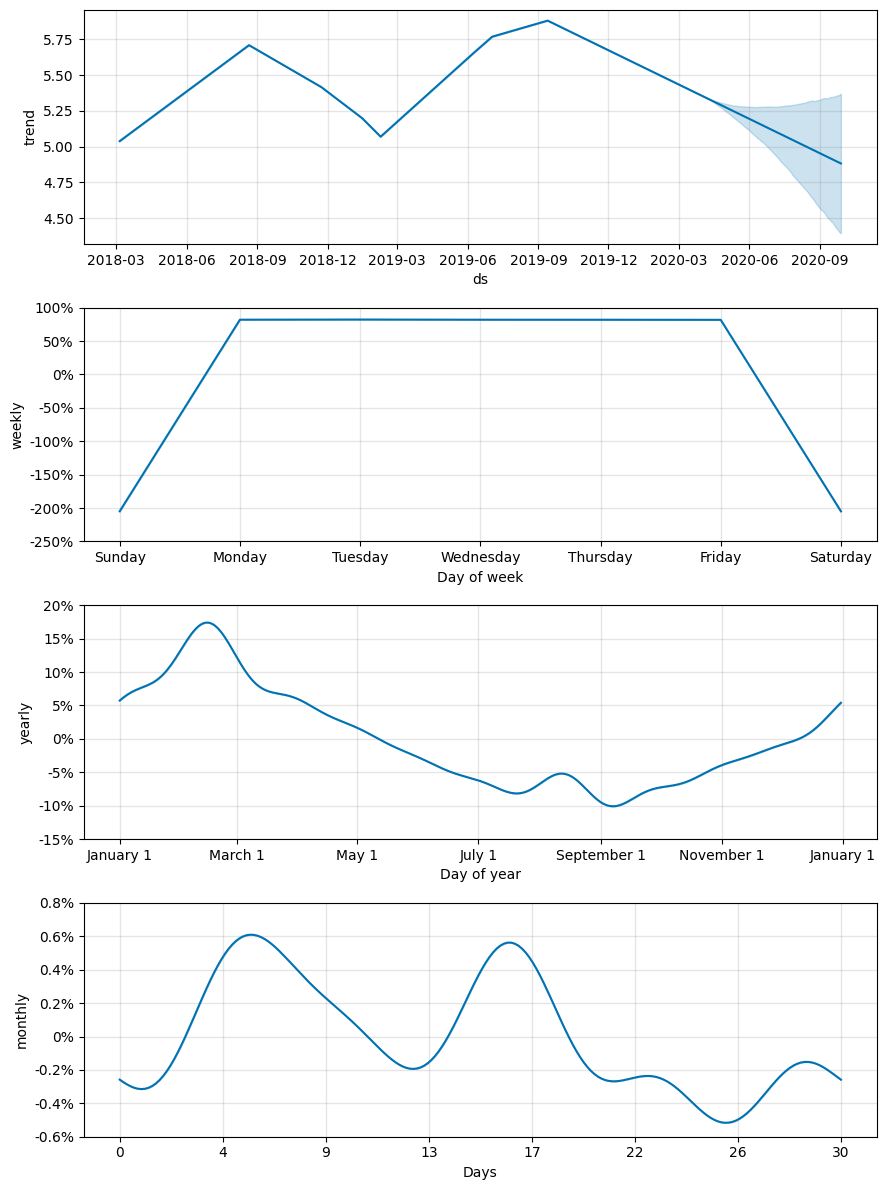

09:26:11 - cmdstanpy - INFO - Chain [1] start processing
09:26:19 - cmdstanpy - INFO - Chain [1] done processing
09:26:20 - cmdstanpy - INFO - Chain [1] start processing
09:26:34 - cmdstanpy - INFO - Chain [1] done processing
09:26:36 - cmdstanpy - INFO - Chain [1] start processing
09:26:46 - cmdstanpy - INFO - Chain [1] done processing
09:26:48 - cmdstanpy - INFO - Chain [1] start processing
09:26:50 - cmdstanpy - INFO - Chain [1] done processing
09:26:51 - cmdstanpy - INFO - Chain [1] start processing
09:26:55 - cmdstanpy - INFO - Chain [1] done processing
09:26:56 - cmdstanpy - INFO - Chain [1] start processing
09:27:08 - cmdstanpy - INFO - Chain [1] done processing
09:27:09 - cmdstanpy - INFO - Chain [1] start processing
09:27:09 - cmdstanpy - INFO - Chain [1] done processing
09:27:09 - cmdstanpy - INFO - Chain [1] start processing
09:27:18 - cmdstanpy - INFO - Chain [1] done processing
09:27:19 - cmdstanpy - INFO - Chain [1] start processing
09:27:19 - cmdstanpy - INFO - Chain [1]

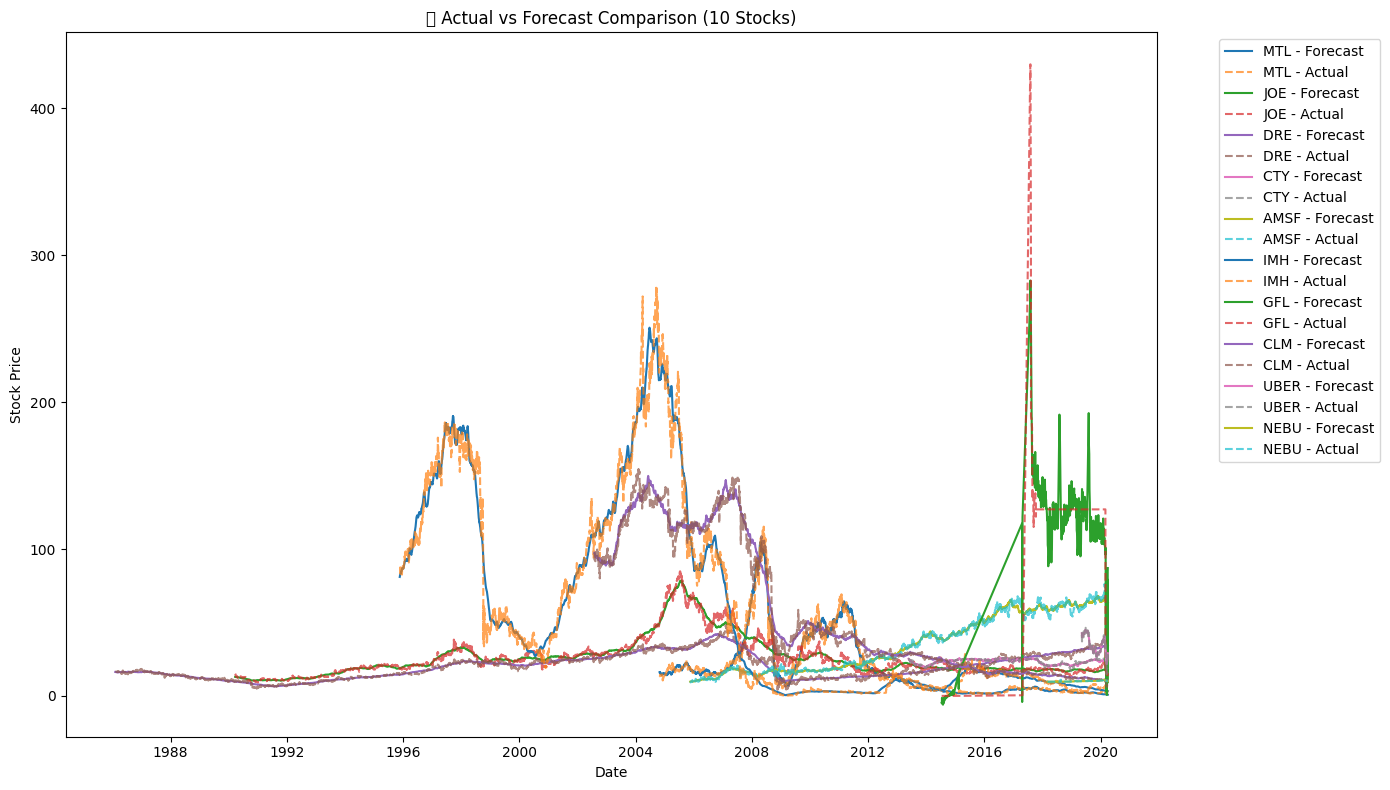

In [16]:
# STEP 10: Show graphs inline for each stock

for file in stock_files:
    stock_name = file.split("/")[-1].replace(".csv", "")
    print(f"\n📈 Showing graphs for {stock_name}...")

    df = pd.read_csv(file)
    data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    data['ds'] = pd.to_datetime(data['ds'])

    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_mode='multiplicative'
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(data)

    future = model.make_future_dataframe(periods=180)
    forecast = model.predict(future)

    # Show forecast plot
    fig1 = model.plot(forecast)
    plt.title(f"Forecast - {stock_name}")
    plt.show()

    # Show components plot
    fig2 = model.plot_components(forecast)
    plt.show()

# STEP 11: Combined Actual vs Forecast for 10 stocks

plt.figure(figsize=(14,8))

for file in stock_files:
    stock_name = file.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(file)
    data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    data['ds'] = pd.to_datetime(data['ds'])

    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_mode='multiplicative'
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(data)

    future = model.make_future_dataframe(periods=180)
    forecast = model.predict(future)

    merged = pd.merge(forecast[['ds','yhat']], data, on='ds', how='left')
    eval_df = merged.dropna()

    plt.plot(eval_df['ds'], eval_df['yhat'], label=f"{stock_name} - Forecast")
    plt.plot(eval_df['ds'], eval_df['y'], linestyle='dashed', alpha=0.7, label=f"{stock_name} - Actual")

plt.title("📊 Actual vs Forecast Comparison (10 Stocks)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

09:29:16 - cmdstanpy - INFO - Chain [1] start processing
09:29:24 - cmdstanpy - INFO - Chain [1] done processing
09:29:25 - cmdstanpy - INFO - Chain [1] start processing
09:29:39 - cmdstanpy - INFO - Chain [1] done processing
09:29:41 - cmdstanpy - INFO - Chain [1] start processing
09:29:51 - cmdstanpy - INFO - Chain [1] done processing
09:29:52 - cmdstanpy - INFO - Chain [1] start processing
09:29:55 - cmdstanpy - INFO - Chain [1] done processing
09:29:55 - cmdstanpy - INFO - Chain [1] start processing
09:30:00 - cmdstanpy - INFO - Chain [1] done processing
09:30:01 - cmdstanpy - INFO - Chain [1] start processing
09:30:13 - cmdstanpy - INFO - Chain [1] done processing
09:30:14 - cmdstanpy - INFO - Chain [1] start processing
09:30:14 - cmdstanpy - INFO - Chain [1] done processing
09:30:15 - cmdstanpy - INFO - Chain [1] start processing
09:30:24 - cmdstanpy - INFO - Chain [1] done processing
09:30:25 - cmdstanpy - INFO - Chain [1] start processing
09:30:25 - cmdstanpy - INFO - Chain [1]

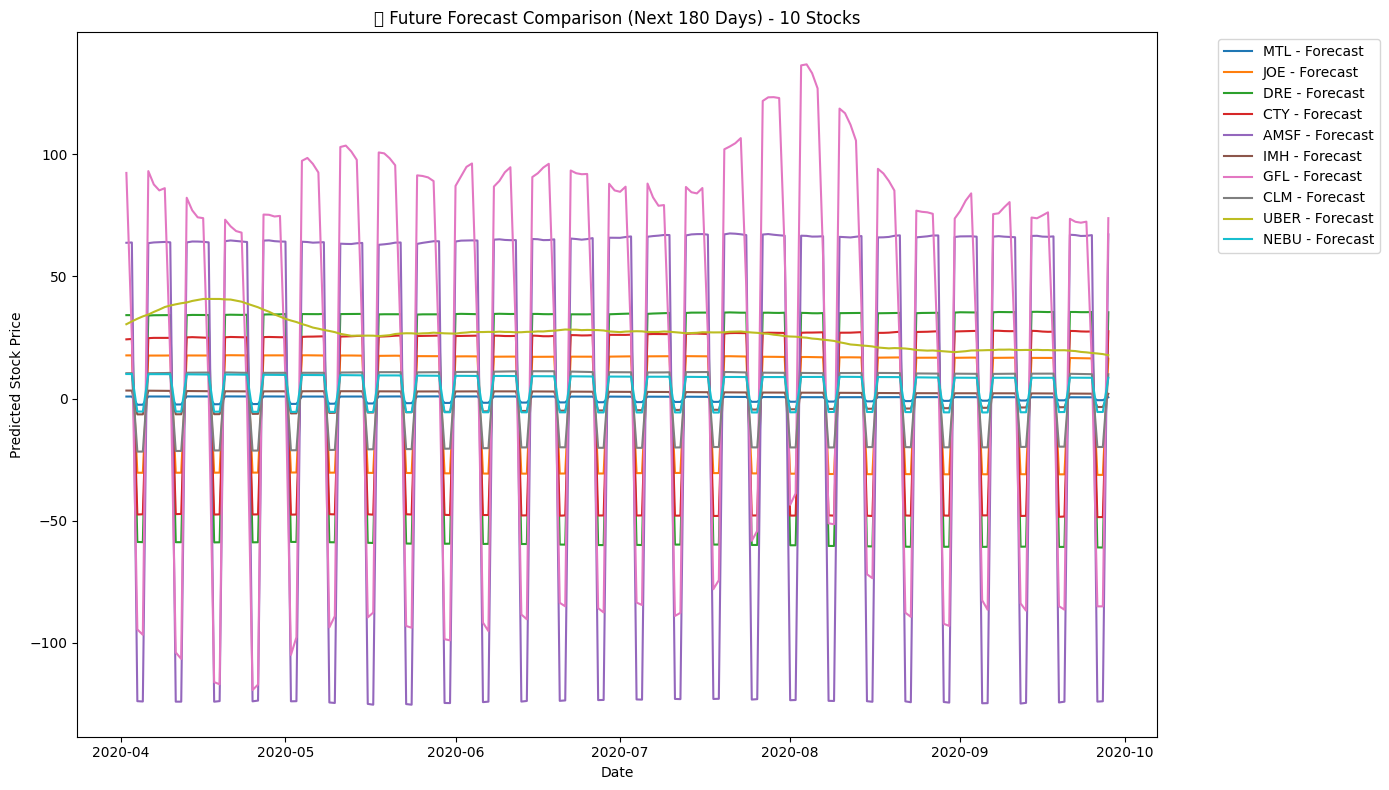

In [17]:
# STEP 11: Combined Forecast (only future 180 days)

plt.figure(figsize=(14,8))

for file in stock_files:
    stock_name = file.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(file)
    data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    data['ds'] = pd.to_datetime(data['ds'])

    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_mode='multiplicative'
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(data)

    future = model.make_future_dataframe(periods=180)
    forecast = model.predict(future)

    # Get only forecast period (after last actual date)
    last_date = data['ds'].max()
    future_forecast = forecast[forecast['ds'] > last_date]

    plt.plot(future_forecast['ds'], future_forecast['yhat'], label=f"{stock_name} - Forecast")

plt.title("📊 Future Forecast Comparison (Next 180 Days) - 10 Stocks")
plt.xlabel("Date")
plt.ylabel("Predicted Stock Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()